In [1]:
import importlib
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn import decomposition
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.collections as collections
import scipy
import shapefile
%matplotlib inline
import seaborn as sns

Замечание: в дальнейшем термин "класс" используется в двух различных значениях
1. Концепция ООП программирования, широко используемая в большинстве современных языков программирования, служащая для объединения программного кода в некие семантически/логически/функционально связанные сущьности, и предоставляющая средства для оперирования с этими сущьностями.
2. Как класс в задачах классификации машинного обучения. В данном случае смысл термина класс близок к бытовому его восприятию (например классом в таком понимании является сорт цветка - роза, тюльпан, и т.д. тип траспортного средства - автомобиль, мотоцикл, самолёт и т.д.)
Читаем источник данных (файл в формате .xlsx) с помощью метода read_excel библиотеки Pandas предазначенной для работы 
с данными, прежде всего для операций с DataFrames - основным способом представления данных используемым различным программным обеспечением в области Machiene Learning / Data Science. Каждый лист Excel-я читаем отдельно
получая для каждого листа отдельный датафрейм.

In [2]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [3]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [4]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [5]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [6]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [7]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [8]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [9]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [10]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [11]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [12]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [13]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [14]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [15]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [16]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [17]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [18]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [19]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [20]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

Для дальнейших операций объединяем полученные датафреймы в список, который в свою очередь состоит из подсписков 
содержащих собственно сам датафрейм и ассоциированное с ним название максимально соответствующее русскому названию
экселевского листа. В дальнейшем, эти названия станут именами столбцов датафреймов содержащих информацию разбитую по годам.

In [21]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

Отдельно сохраняем соответствующие русскоязычные названия в виде списка, в том же порядке в котором идут датафреймы в списке датафреймов.

In [22]:
features_names_ru = [
    'ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ',
    'численность персонала без ученых степеней, занятых НИОКР',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель кандидата наук- человек',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель доктора наук- человек',
    'Численность аспирантов по субъектам Российской Федерации - человек',
    'Численность докторантов по субъектам Российской Федерации 0человек',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ',
    'РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)',
    'ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ (УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ, ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ, В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)',
    'ЗАТРАТЫ НА ТЕХНОЛОГИЧЕСКИЕ ИННОВАЦИИ ОРГАНИЗАЦИЙ (руб)',
    'ОБЪЕМ ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ (МИЛЛИОНОВ РУБЛЕЙ)',
    'УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ, УСЛУГ1), ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)',
    'численность населения по субъектам российской федерации (оценка на конец года; тысяч человек)',
    'Валовой региональный продукт по субъектам Российской Федерации (в текущих  ценах;миллионов рублей)'
]

Избаляемся от строчки "Всего" в каждом датафрейме из списка.

In [23]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

Создаём список "годовых" датафреймов, каждый из которых содержит полный список показателей (features в терминах Data Science) для каждого региона (Столбцы - показатели, строки - регионы). Используем стандартную операцию Pandas-овских датафреймов merege (для объединения "показательных" датафреймов в "годовые"). В качестве столбца используемого для объединения используем столбец "Region". Т.е. объединяем все показатели по данному региону за год.

In [24]:
merged_df_list = []
for year in range(2005, 2015):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

Вспомогательные функции для корректировки некорректно представленных значений (например содержащих в качестве десятичного разделителя запятую) в датафреймах.

In [25]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [26]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

Импортируем стандартный класс библиотеки ScikitLearn для приведения значений к одному и тому же масштабу. Создаём экземпляр этого класса.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

Корректируем вручную одно из неправильных значений, а ко всему остальному применяем функции коррктировки.

In [29]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)
merged_df_dict = {}
for i in range(0, 10):
    prepared_df = merged_df_list[i].applymap(str_to_num)
    prepared_df = prepared_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)
    merged_df_dict[i + 2005] = prepared_df   

Объединяем список "годовых" датафреймов в один датафрейм с иеррархическим индексом "Год/Регион". В дальнейшем будем производить кластеризацию используя именно этот датафрейм. Кластер в общем случае объединяет "в чём то схожие" регионы, причём кластер при этом имеет временную (ударение на "у") проятжённость. Т.е. каждый кластер простирается от 2005-го года до 2014-го. И один и тот же регион в разные годы может принадлежать к различным кластерам (например в 2005 - к "нулевому", в 2006 - ко "второму", а в остальные годы - к "первому") а может и всё время оставаться в одном и том же кластере. 

In [30]:
hier_concatenated_df = pd.concat(merged_df_dict, names=['Year', 'Region'])

In [31]:
hier_concatenated_df = hier_concatenated_df.applymap(str_to_num)
hier_concatenated_df = hier_concatenated_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)

Корректируем вручную ещё два неверных значения.

In [32]:
hier_concatenated_df.loc[(2014, 41), 'GrossProduct'] = 1671397.10

In [33]:
hier_concatenated_df.loc[(2014, 8), 'GrossProduct'] = 395700.10

In [34]:
droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

Приводим к единому масштабу, используя ранее созданный экземпляр класса MinMaxScaler.

In [35]:
scaled_with_dropped_regions_hier_concantenated_df = pd.DataFrame(
        scaler.fit_transform(droped_regions_hier_concatenated_df),
        columns=droped_regions_hier_concatenated_df.columns
    )

Алгоритмы машинного обучения в библиотеке ScikitLearn оформлены в виде классов, получающих на входе (при создании экземпляра класса) параметры  определяюще работу соответствующего алгоритма. Далее при вызове метода fit созданный экземпляр класса получает значения используемые для обучения в виде массивов библиотеки Numpy.
Извлекаем из датафрейма соответствующий массив Numpy просто обращаясь к полю датафрейма values.
В качестве алгоритам класстеризации используем MeanShift. В частности, потому что он не требует заранее задавать количество кластеров (в отличие например от наиболее популярного алгоритма "обучения без учителя" K-Means).
Создаём экземпляр класса MeanShift, задавая ему некоторые из параметров. Далее вызываем стандартный для всех классов ScikitLearn реализующих методы машинного обучения метод fit передавая ему массив обучающих значений.
После обращаясь уже к "обученному" (произведшему класстеризацию) экземпляру класса выводим количество получившихся кластеров.

In [36]:
prepared_df_values = scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth = cluster.estimate_bandwidth(prepared_df_values, quantile=0.1, n_samples=prepared_df_values.shape[0])
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(prepared_df_values)
labels = ms.labels_
cluster_centres = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Количество кластеров: %d" % n_clusters_)

Количество кластеров: 4


Выводим (используя библиотеку Seaborn) кроскорреляционную матрицу. Кроме значения коэффициента корреляции степень корреляции выделяется цветом.

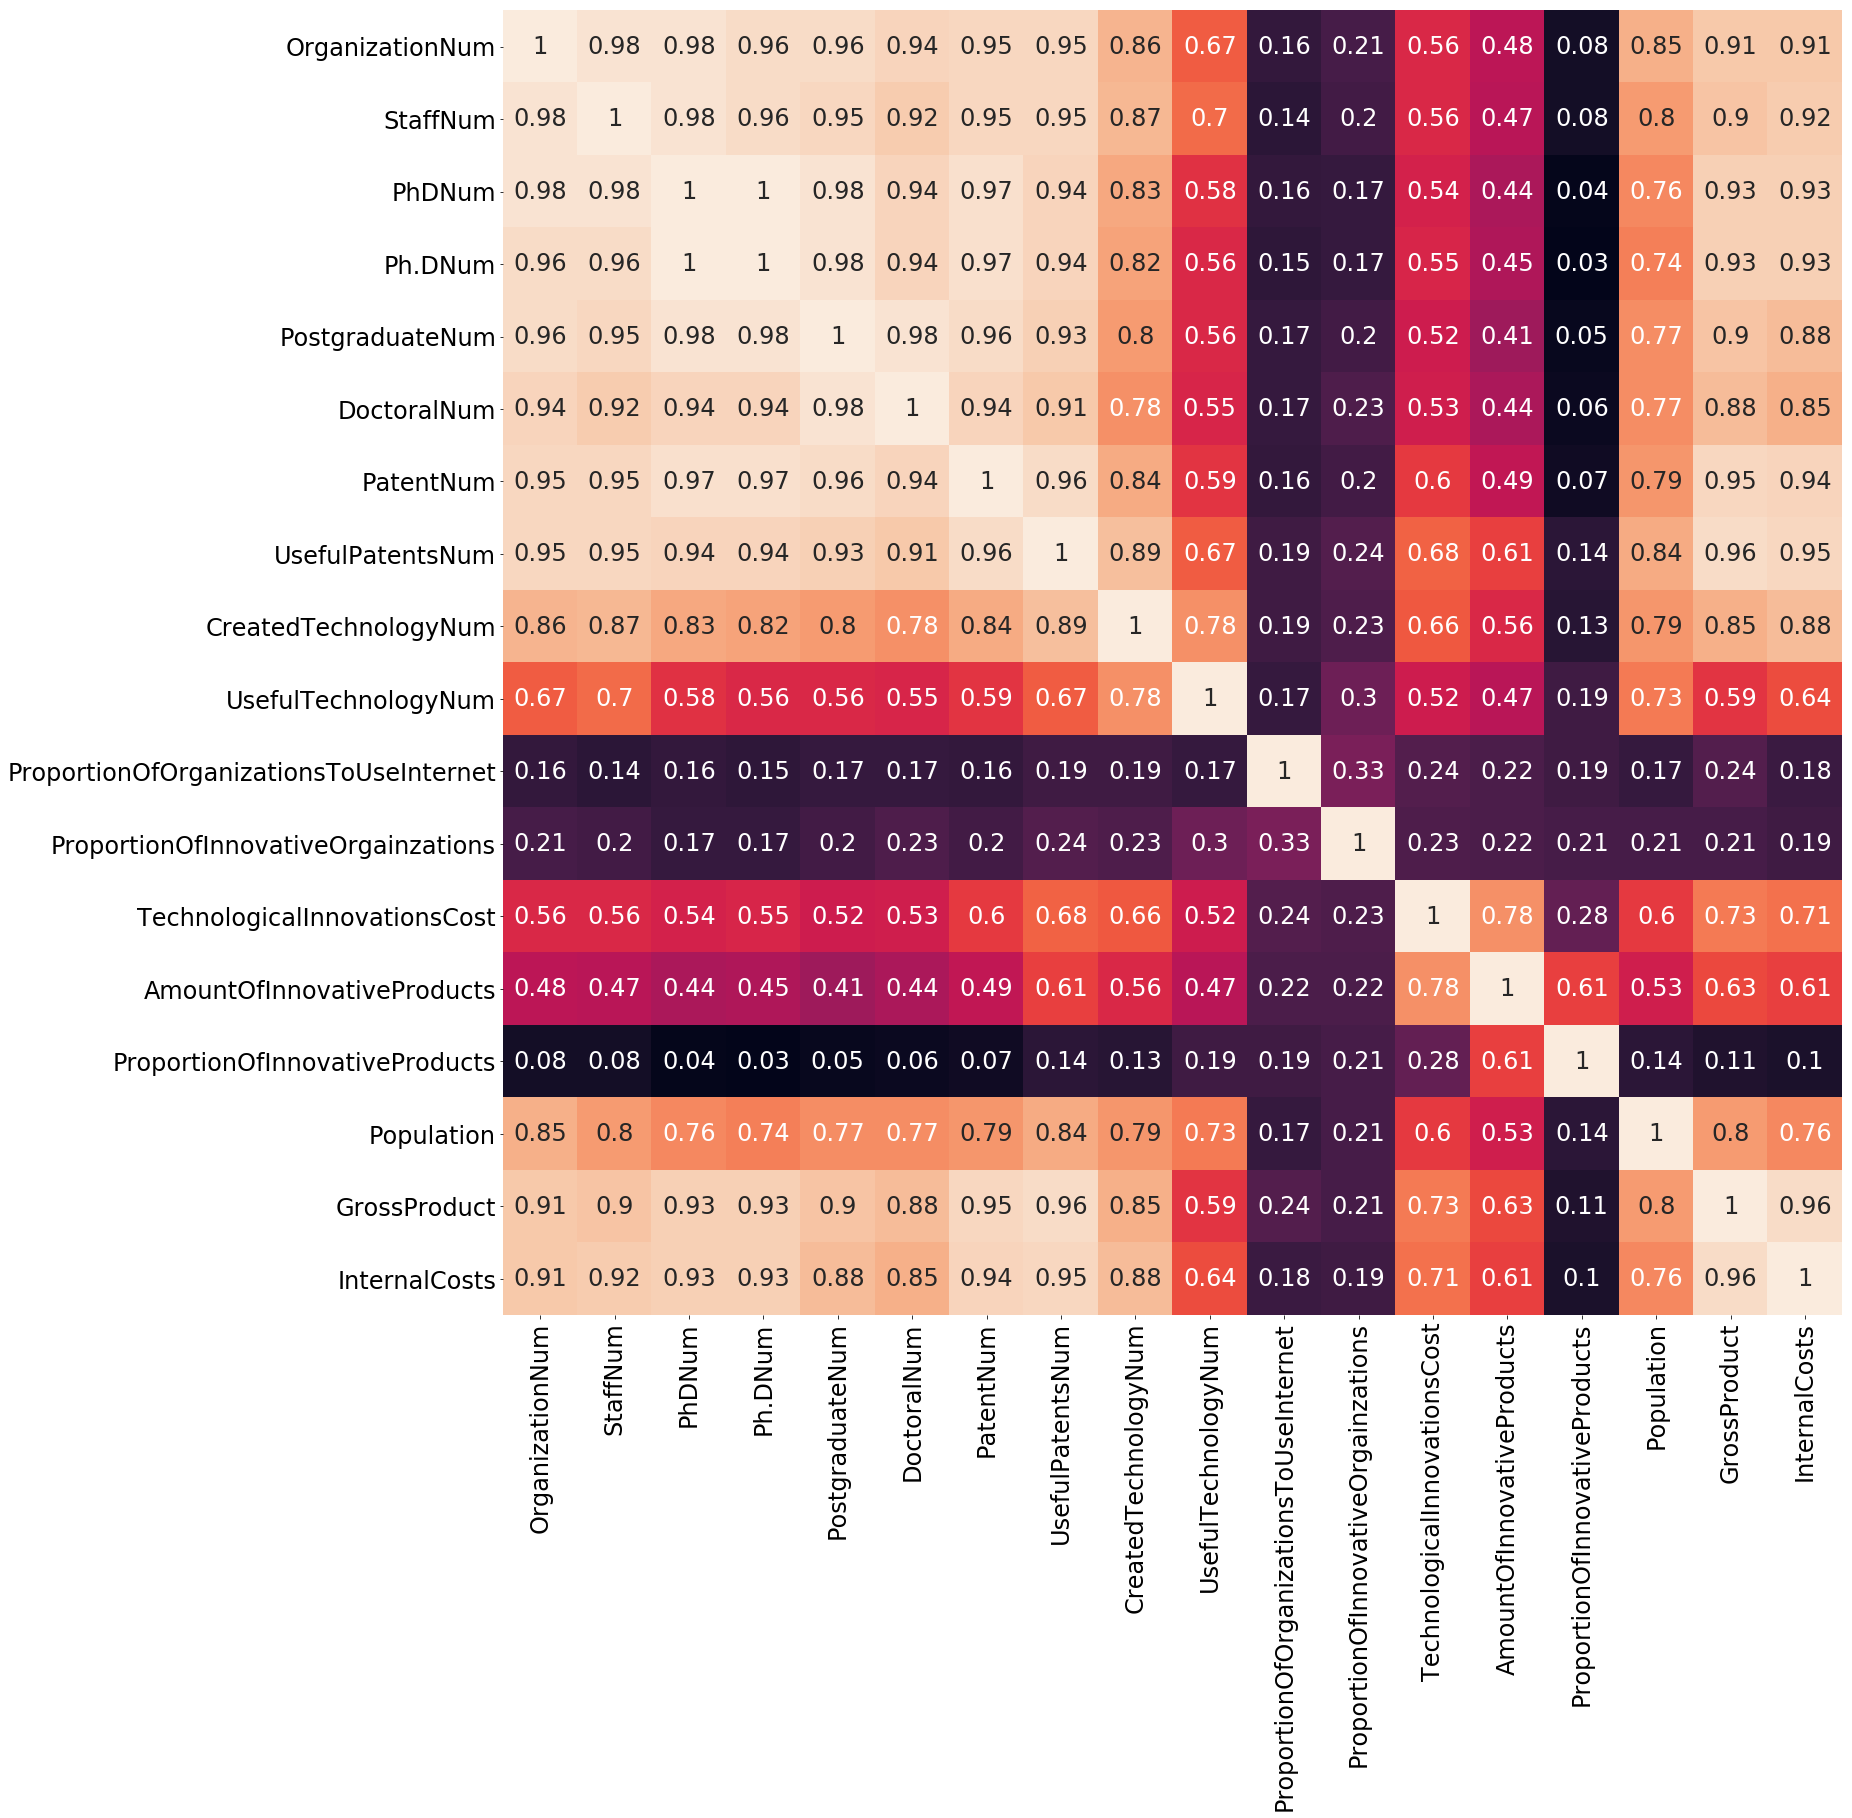

In [37]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(scaled_with_dropped_regions_hier_concantenated_df.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [38]:
cross_corr_matrix = scaled_with_dropped_regions_hier_concantenated_df.corr()

Далее нам необходимо как то графически отобразить полученную в результате клстеризации информацию, для того что бы эти самые результаты хотя бы как нибудь понять. А для этого нам необходимо отробрать наиболее "важные" показатели. Мы можем для этого использовать полученную шагом ранее кроскореляционную матрицу выбрав наименее коррелирующие пары показателей. Но этот подход выявляет только линейные зависимости, и ктому же нам придётся самим как-то писать дополнительный программный код для автоматизации этого выбора (что довольно громоздко) либо выбирать пары вручную что трудно и времязатратно.
Попробуем применить другой подход. Воспользуемся тем что некоторые методы "обучения с учителем" (supervised learning) могут ранжировать признаки (features, столбцы) по степени важности. В частности таким свойством обладают методы основанные на объединении (ensemble) деревьев решений, например Random Forest ("Лес случайных деревьев" https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm). В каждом узле такого дерева присходит вычисление энтропии по Шеннону либо значение критерия Джинни (https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy), что автоматически даёт нам так же выявление нелинейных зависимостей. А разметка по классам необходимая для применения методов supervised learning у нас уже есть - принадлежность к тому или иному кластеру мы можем трактовать как принадлежность к соответсвующему классу.
Создаём копию датафрейма

In [39]:
prepared_for_supevised_df = scaled_with_dropped_regions_hier_concantenated_df.copy()

Создаём отдельное поле (столбец) которое и будет содержать метку класса (номер кластера).

In [40]:
prepared_for_supevised_df['cluster_class'] = labels

Определяем вспомогательную функцию которая понадобиться для определения лучшего сочетания параметров выбранного метода supervised learning (Random Forest-а)

In [41]:
def report_best_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Определяем допустимые диапазоны значений различных параметров Random Forest-а, для дальнейшего применения рандомизированного пойска наилучшего сочетания значений параметров.

In [42]:
param_dist = {"max_depth": [3, 7],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

Создаём экземпляр стандартного ScikitLearn  класса RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_estimators=20)

Создаём экземпляр класса RandomSearchCV для определения наилучшего набора значений параметров RandomForestClassifier-а

In [44]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

Запускаем процесс пойска наилучшего сочетания значений параметров.

In [45]:
start = time()
random_search.fit(prepared_df_values, labels)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report_best_score(random_search.cv_results_)

RandomizedSearchCV took 5.57 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.951 (std: 0.039)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.934 (std: 0.035)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.927 (std: 0.007)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}



Произвёдем определение наилучшего сочетания значений параметров RandomForestClassifier-а так же посредством простого пойска по сетке значений параметров.

In [46]:
param_grid = {"max_depth": [3, 7],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)

Производим пойск по сетке значений параметров.

In [47]:
start = time()
grid_search.fit(prepared_df_values, labels)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report_best_score(grid_search.cv_results_)

GridSearchCV took 62.17 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.955 (std: 0.045)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.953 (std: 0.044)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.951 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.951 (std: 0.045)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}



Как видим простой пойск по сетке нашёл лучшее сочетание значений параметров. Создаём экземпляр RandomForestClassifier-а подставляя этот набор значений.

In [48]:
better_clf = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='gini', max_depth=7, max_features=10, min_samples_leaf=1, min_samples_split=2)

Запускаем процесс обучения классификатора.

In [49]:
better_clf.fit(prepared_df_values, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Определяем важность показателей (features) инновационности (номера соответсвующих столбцов). И выводим диаграмму в графическом виде представляющую важность показателей (в виде высоты столбцов).

Feature ranking:
1. feature 10 (0.292499)
2. feature 11 (0.275714)
3. feature 1 (0.103293)
4. feature 7 (0.076413)
5. feature 14 (0.056206)
6. feature 9 (0.049620)
7. feature 13 (0.042539)
8. feature 0 (0.033806)
9. feature 16 (0.019146)
10. feature 2 (0.012199)
11. feature 15 (0.008339)
12. feature 12 (0.007355)
13. feature 3 (0.006135)
14. feature 5 (0.004336)
15. feature 8 (0.004065)
16. feature 4 (0.002946)
17. feature 17 (0.002790)
18. feature 6 (0.002598)


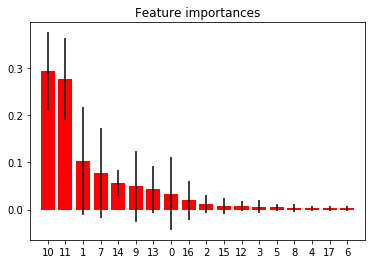

In [50]:
importances = better_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in better_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(prepared_df_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(prepared_df_values.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(prepared_df_values.shape[1]), indices)
plt.xlim([-1, prepared_df_values.shape[1]])
plt.show()


Как видим самым важным (весомым) показателем оказался показатель с номером десять (считая от нуля) - "УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ"
Выделяем в отдельный DataSeries (одномерный DataFrame) имена (англязычные) показателей.

In [51]:
features = scaled_with_dropped_regions_hier_concantenated_df.columns

Далее нам надо отобразить класстеризованные регионы на двумернных проекциях попарных сочетаний соответсвующих показателей. Для этого мы и выбирали наиболее значимые показатели - что бы сократить число выводимых двумерных проекций.
Задача графического отображения класстеризованных регионов на проекциях требует указания множества различных параметров отображения, и является довольно громоздкой. Для её решения был создан класс ClustersDrawer, исходный код (текст) которого вынесен в отдельный файл clusters_drawer.py

In [52]:
X = prepared_df_values
cluster_labels = ms.labels_

In [92]:
import clusters_drawer
importlib.reload(clusters_drawer)

<module 'clusters_drawer' from '/home/uldo/work/rank/hier-clustering/Task_1/clusters_drawer.py'>

Среди задаваемых параметров следует выделить ms - обученный MeanShift кластеризатор содержащий информацию о кластерах (принадлежности того или иного региона к тому или иному кластеру) и tuple (10, 7, 9, 14, 1) - номера наиболее важных показателей.

	 0


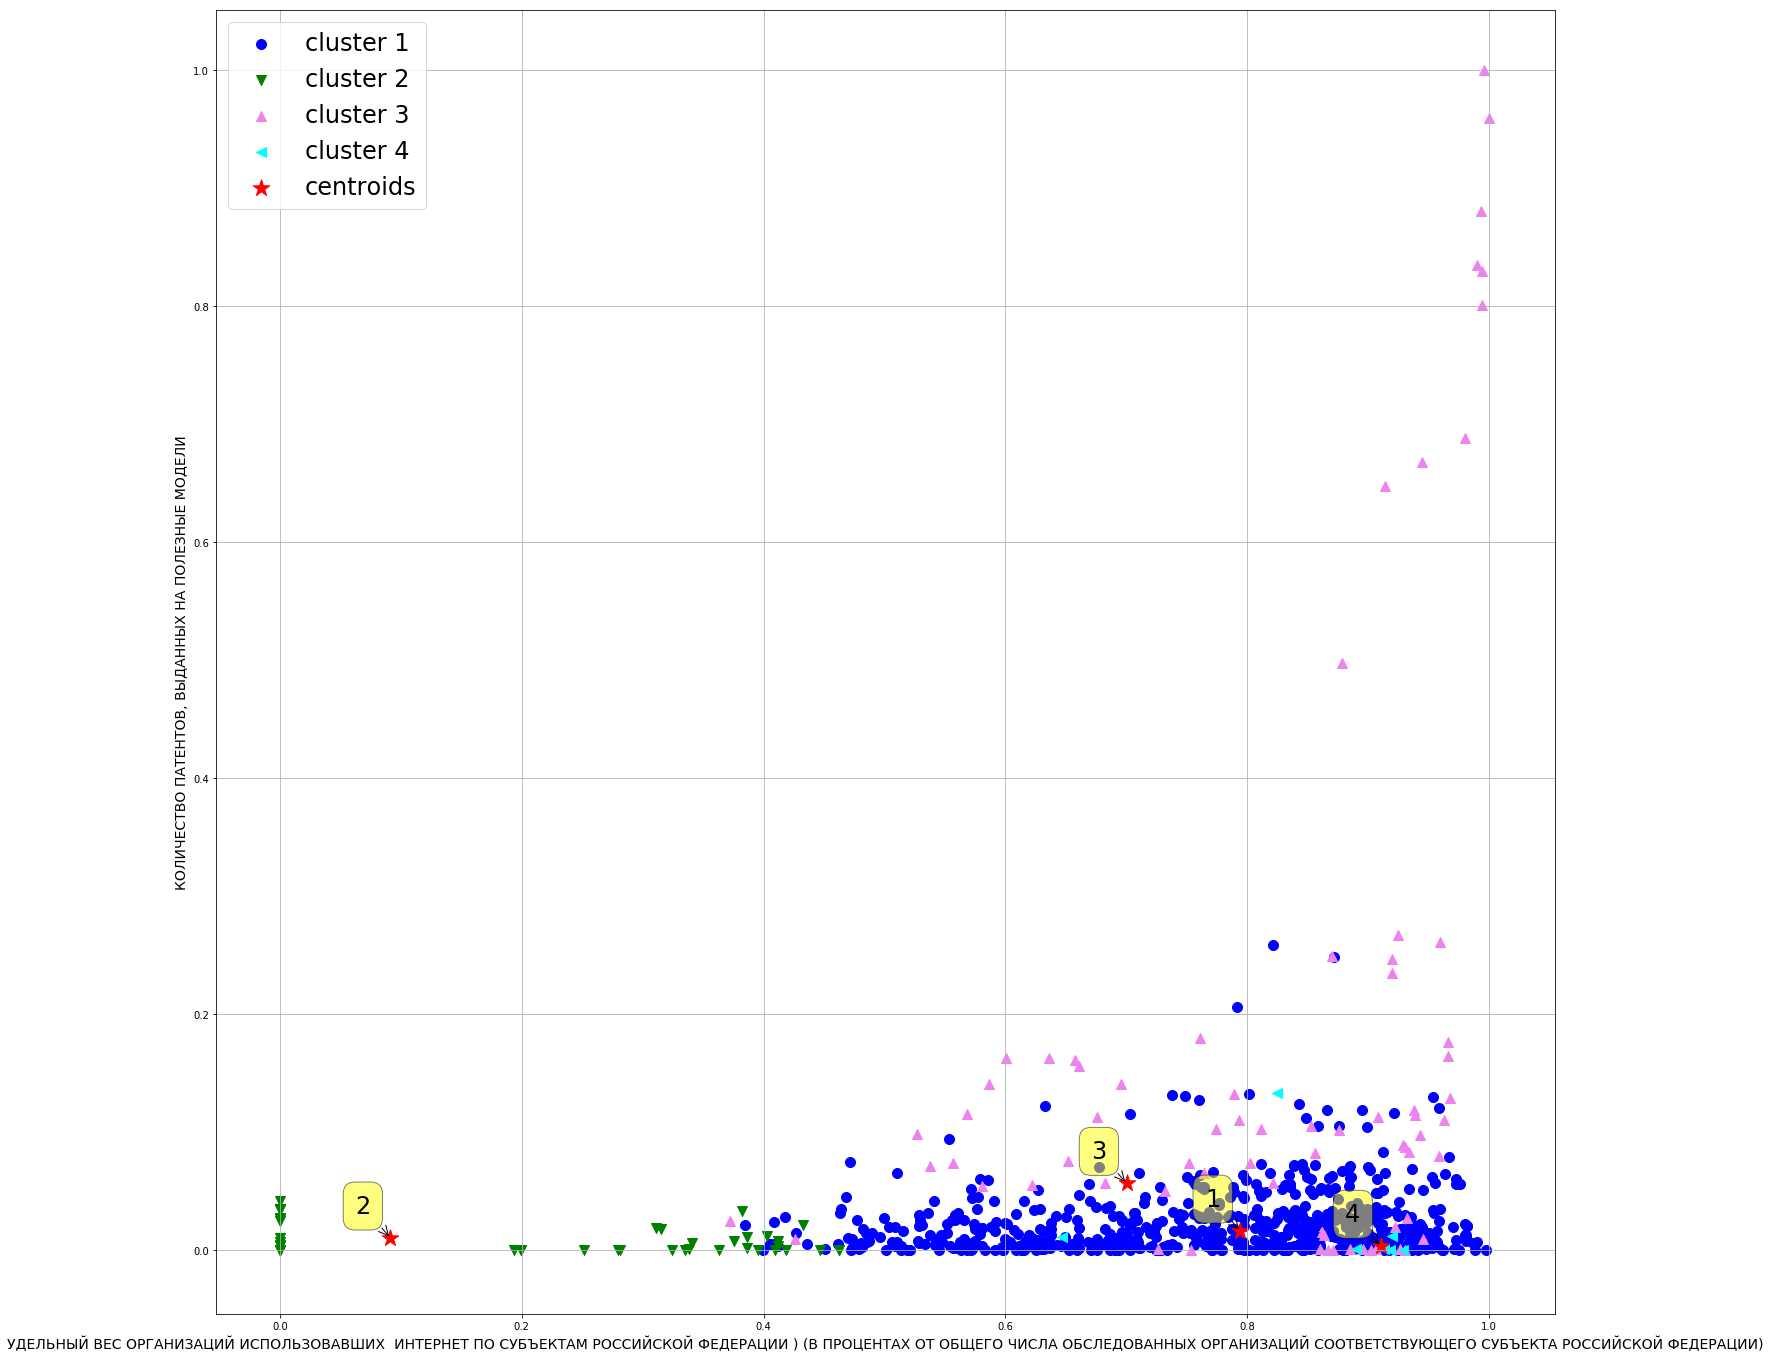

	 1


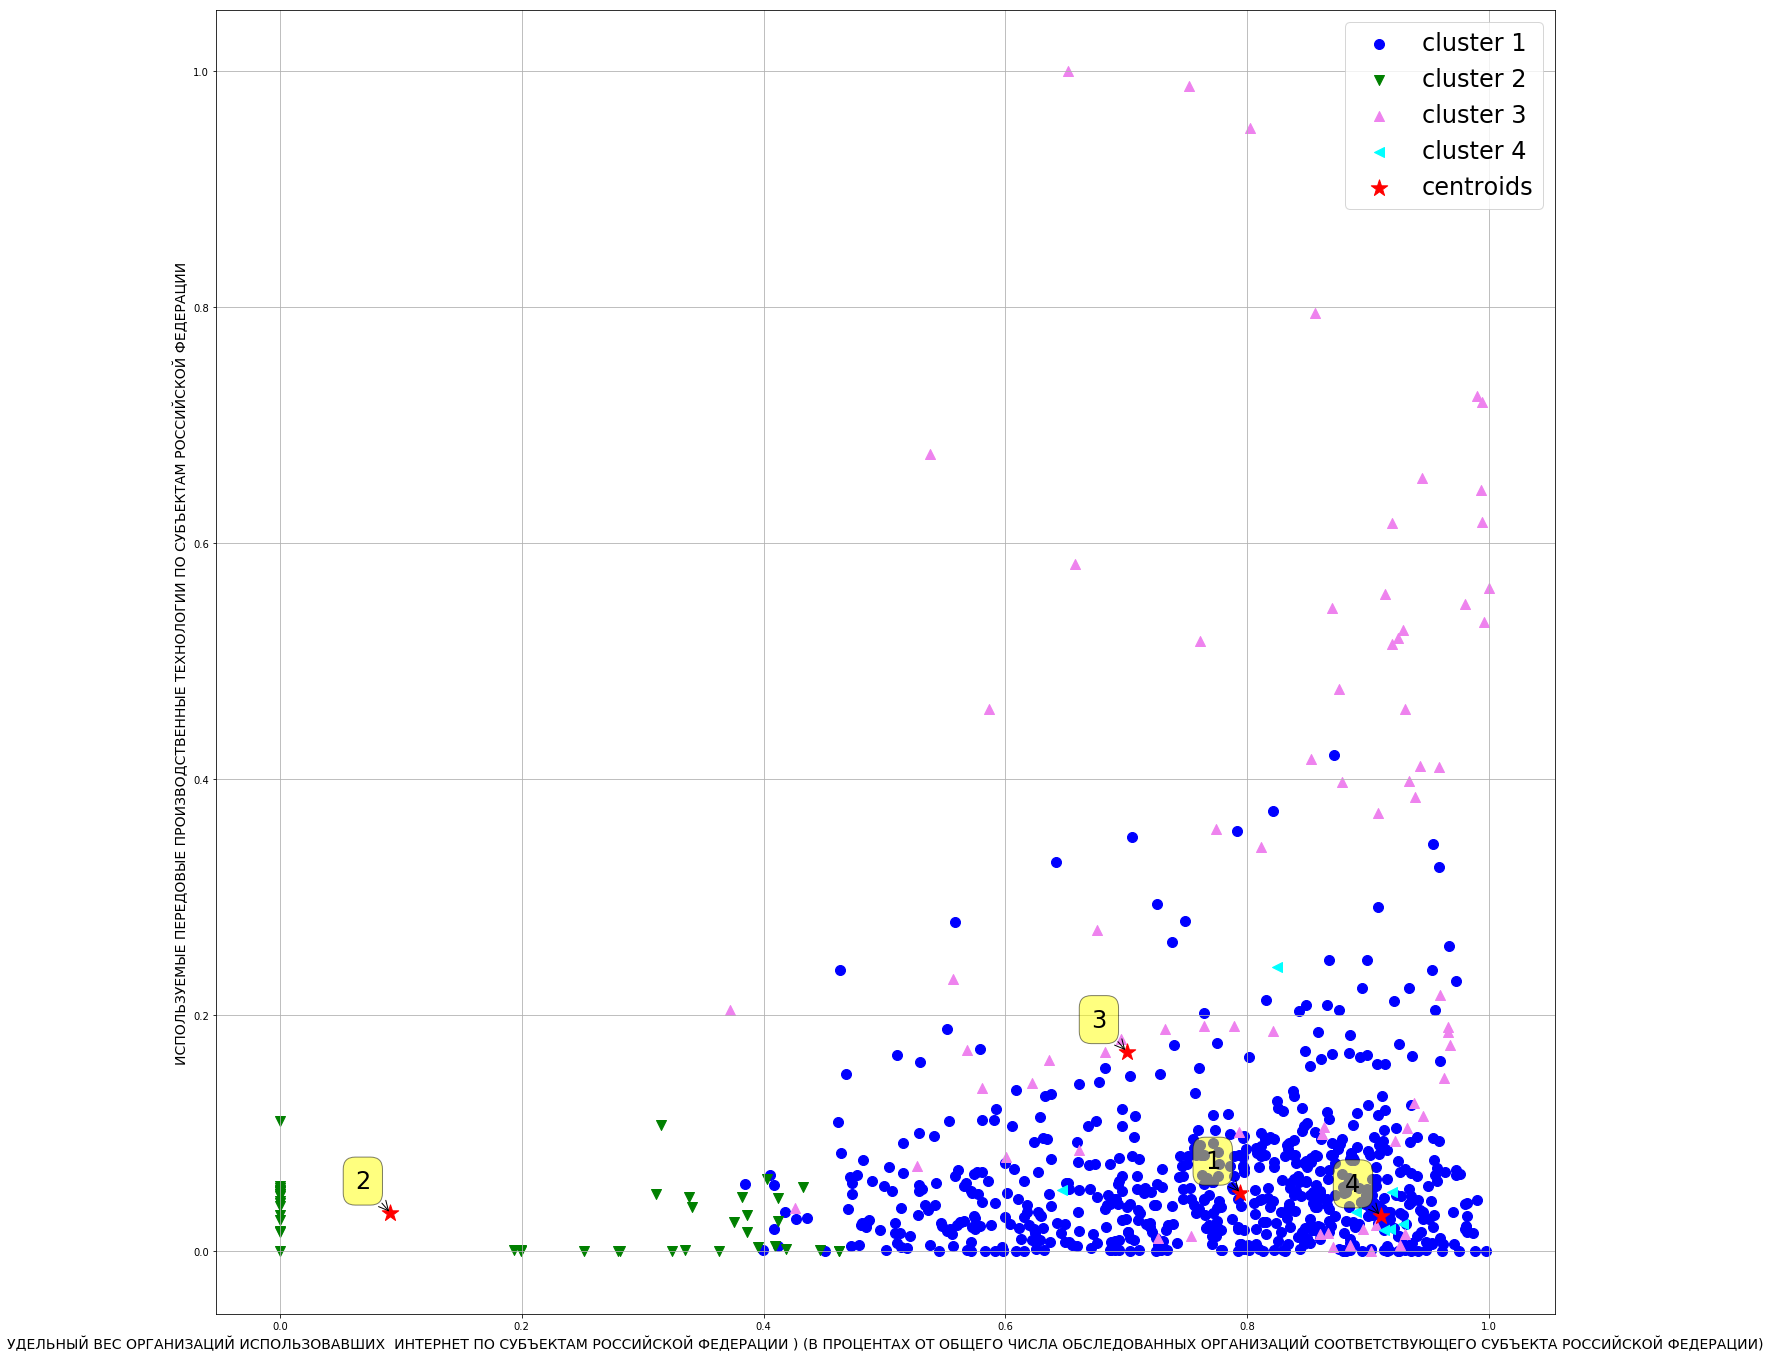

	 2


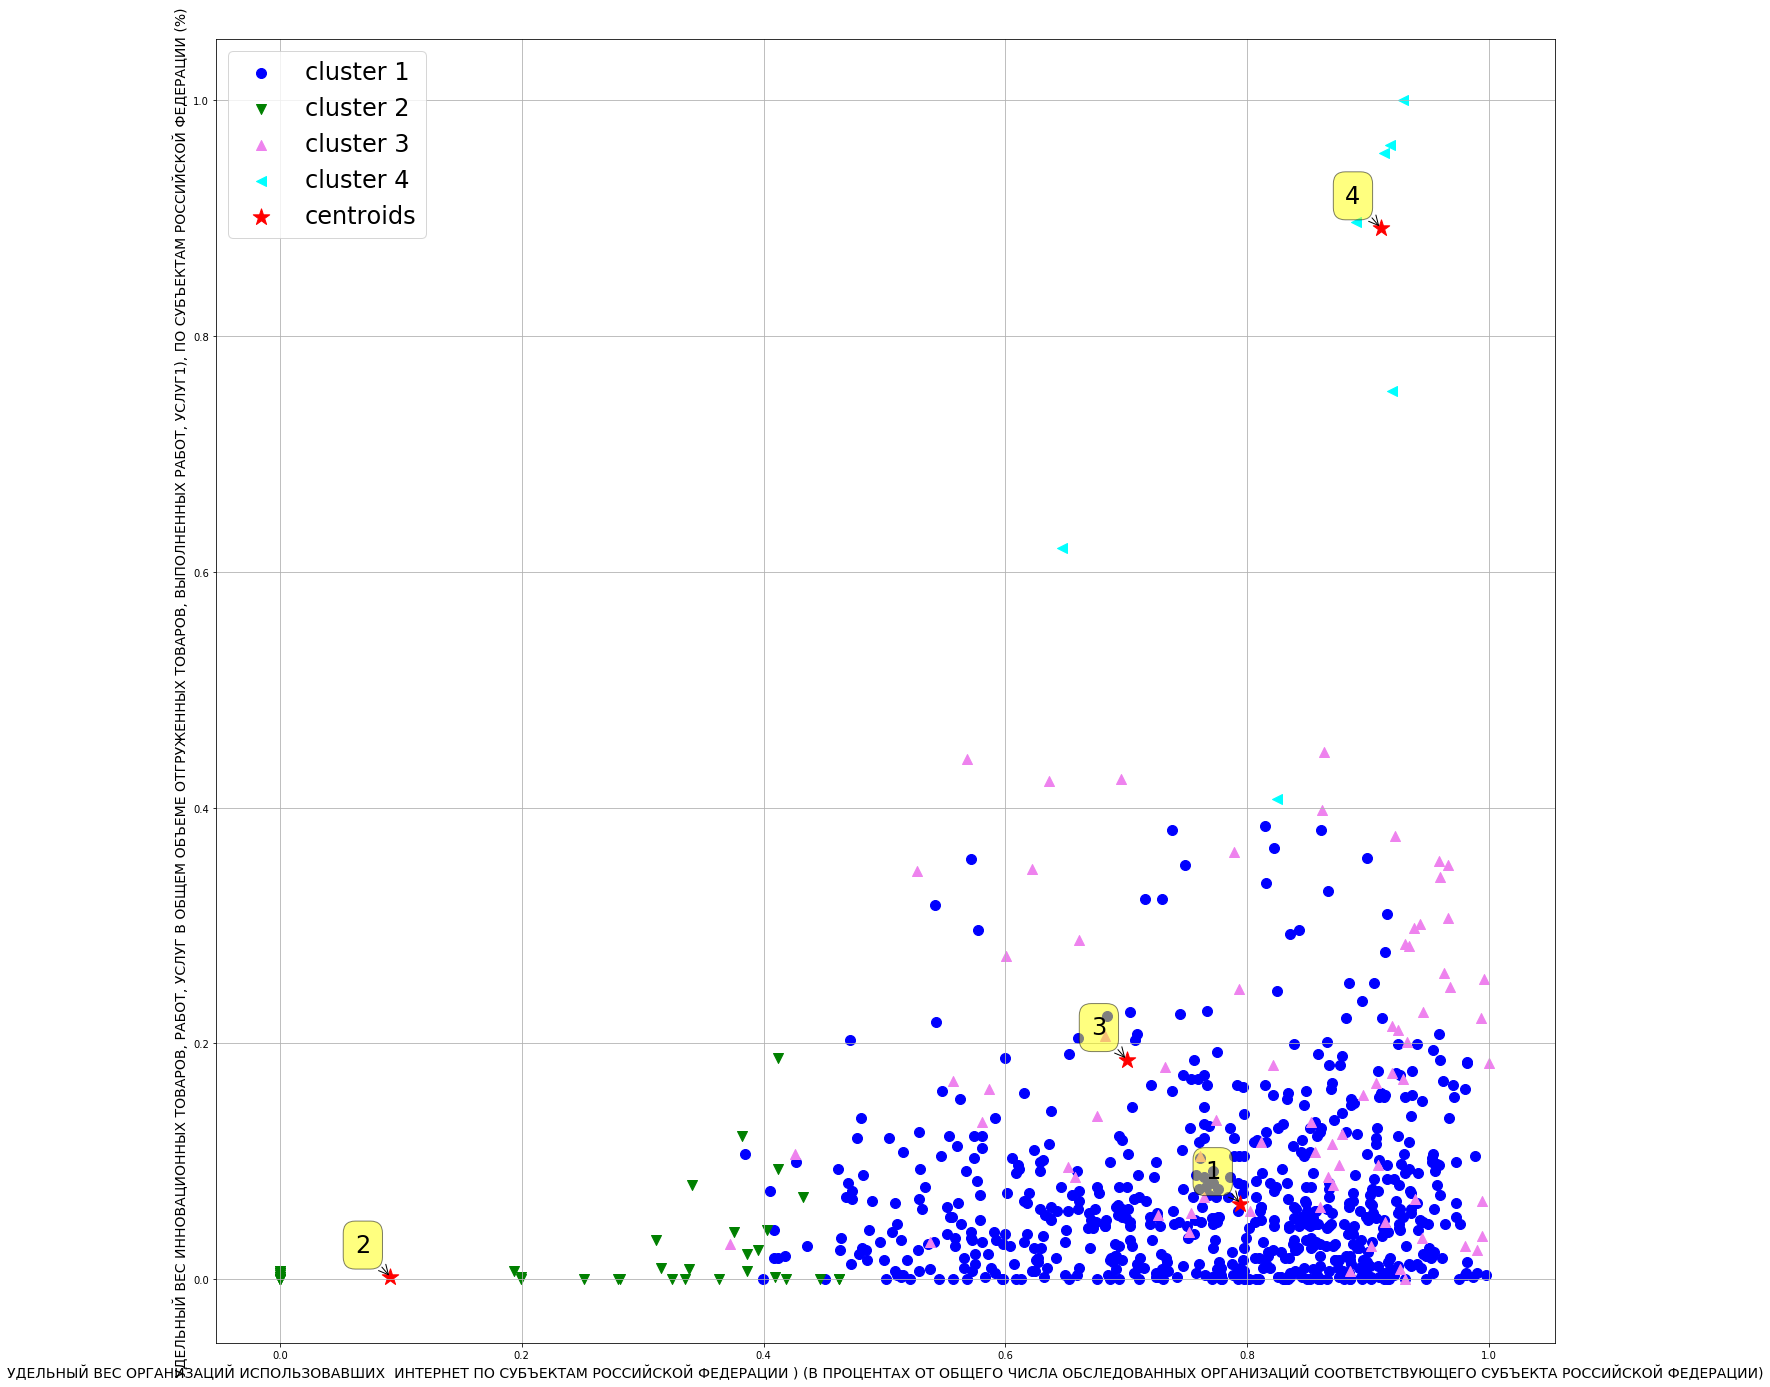

	 3


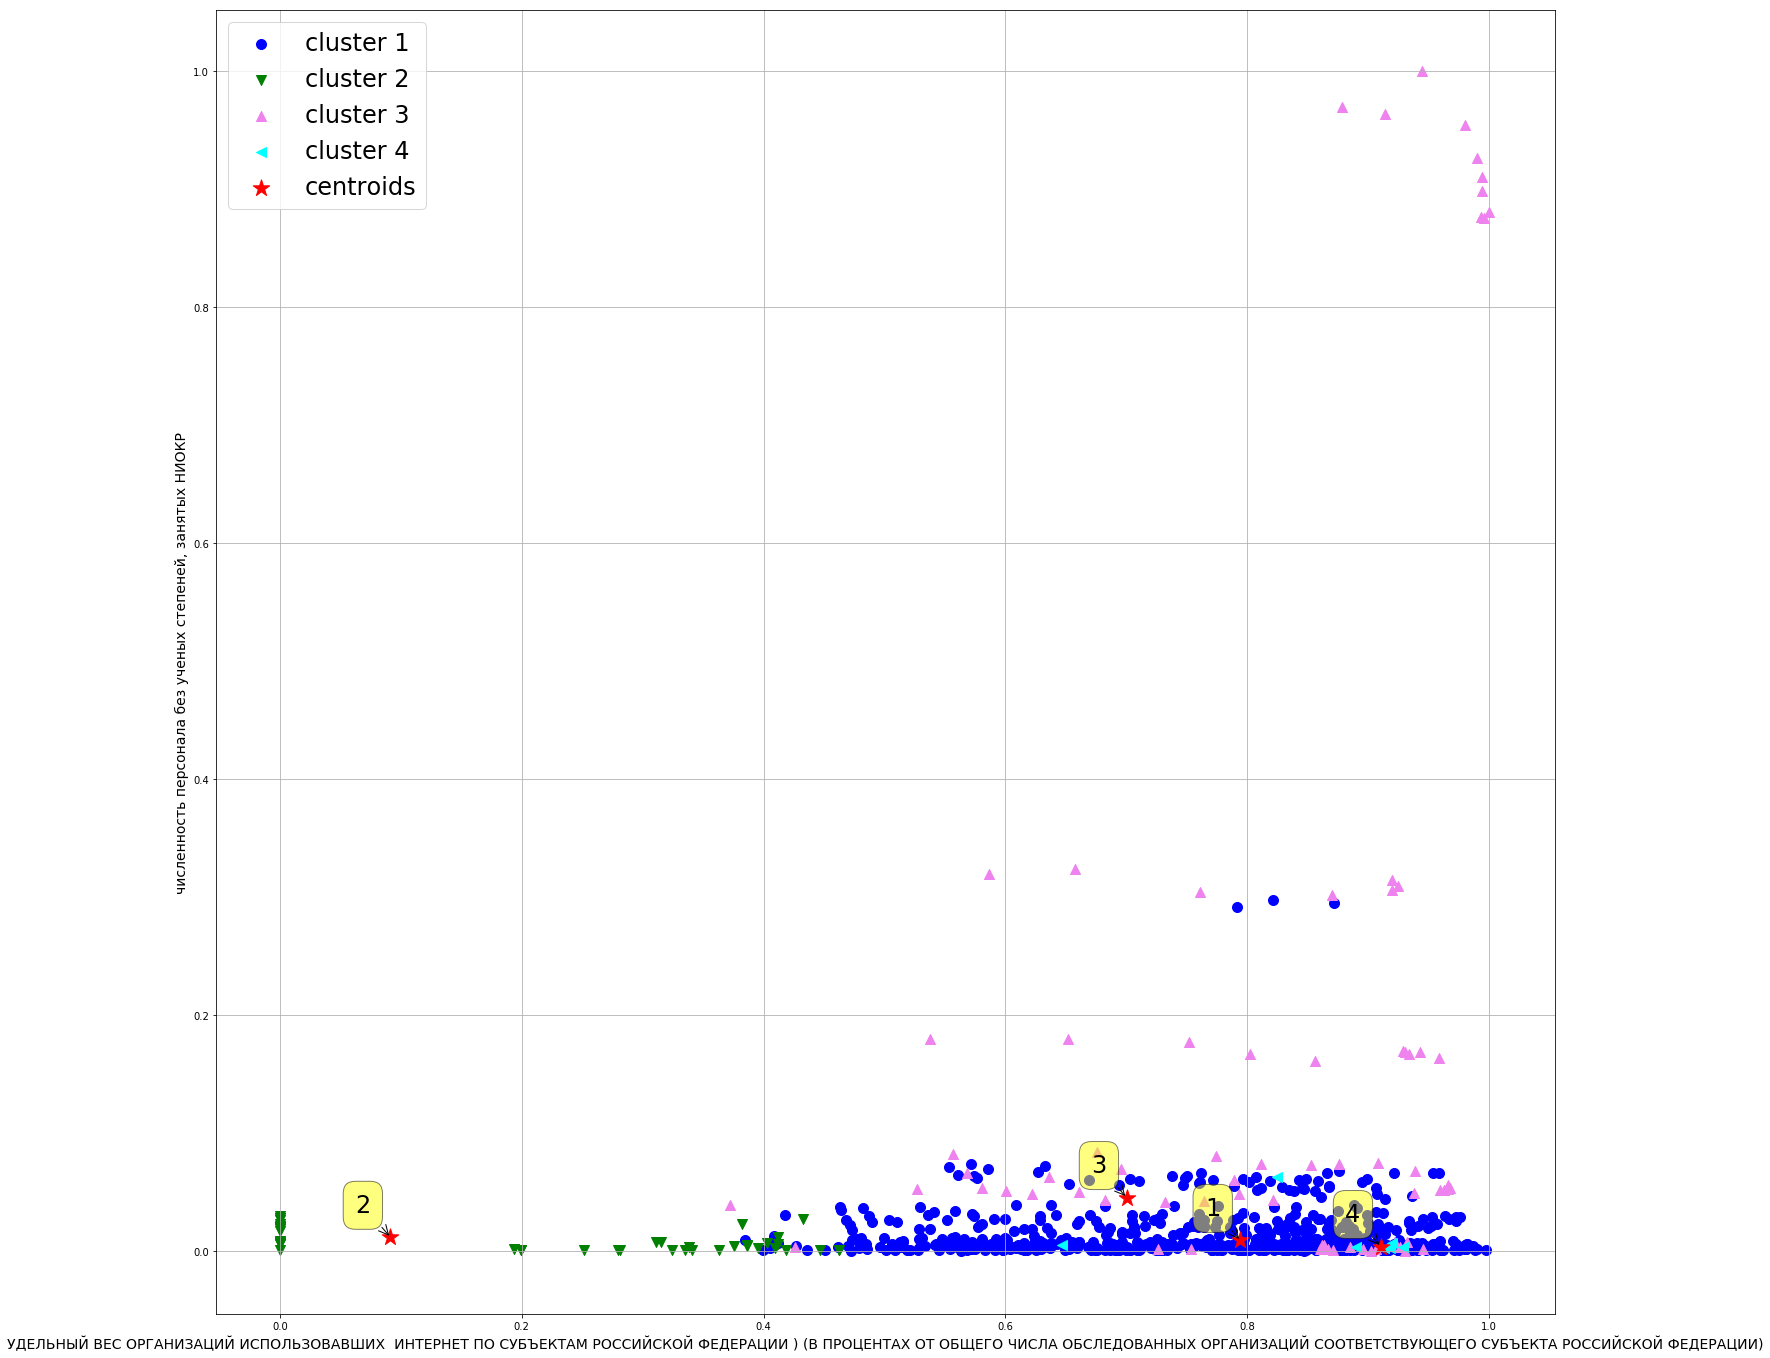

	 4


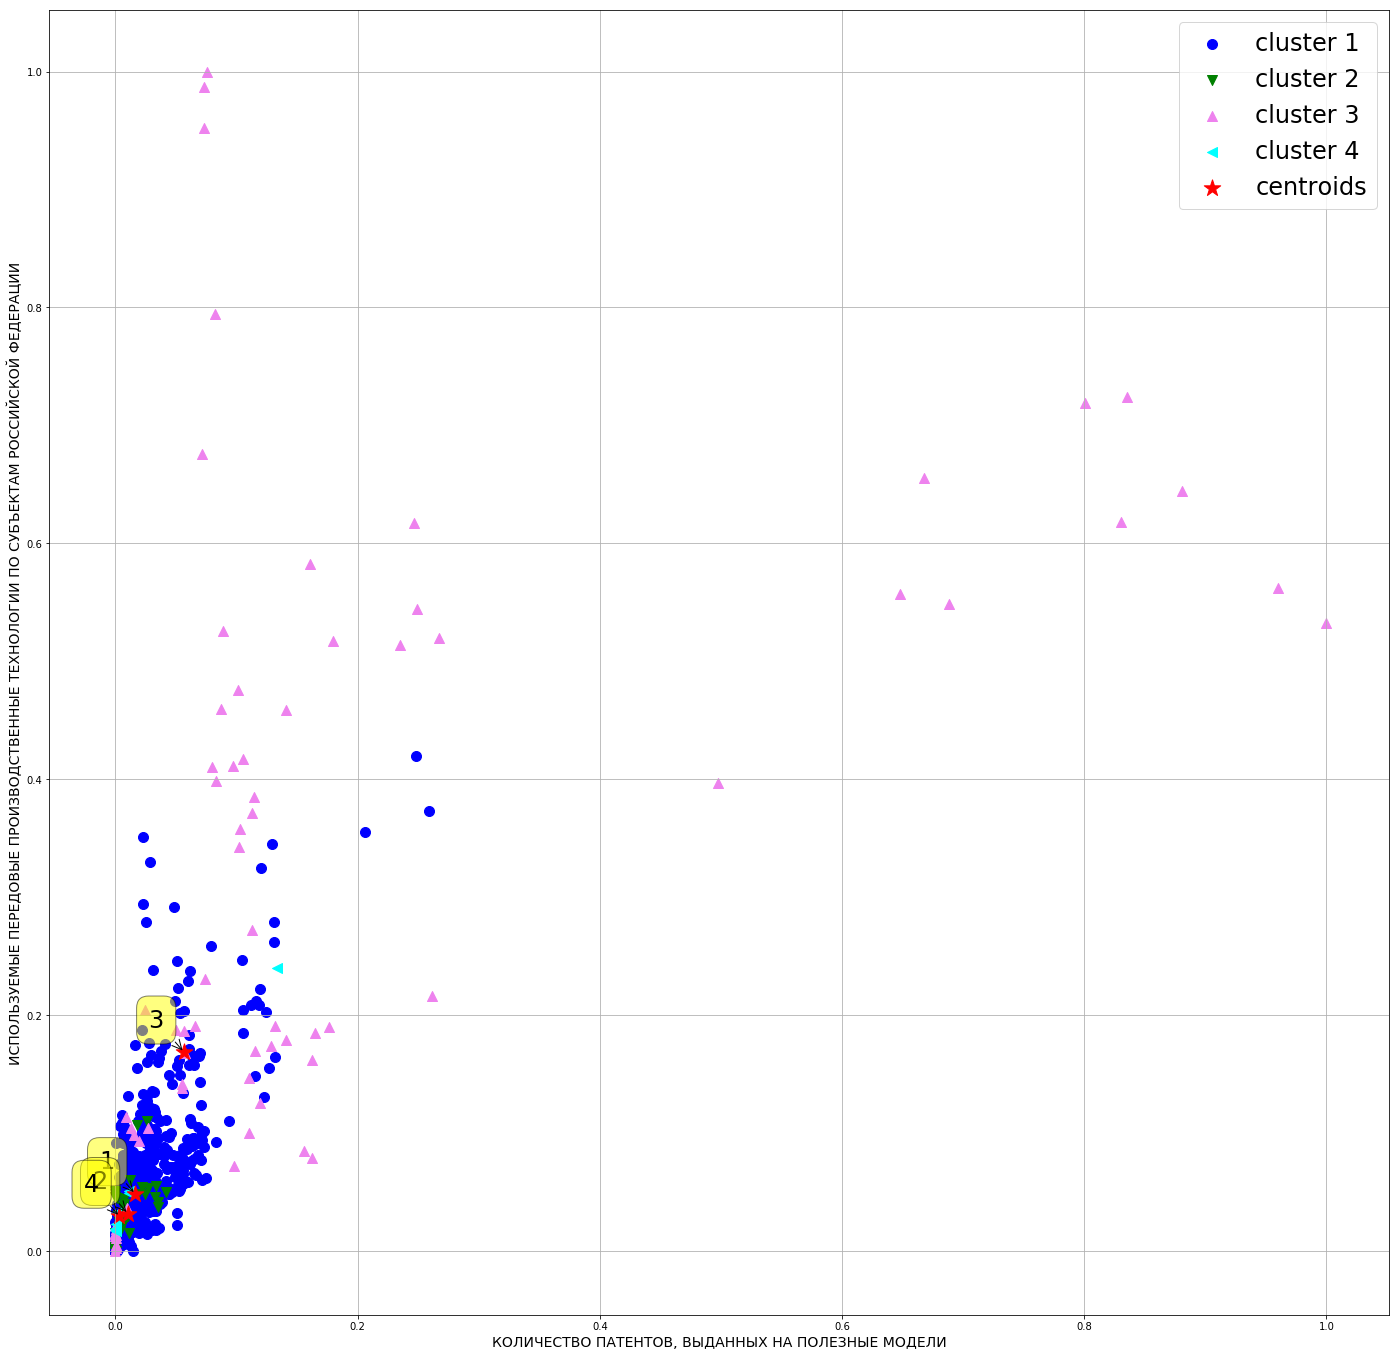

	 5


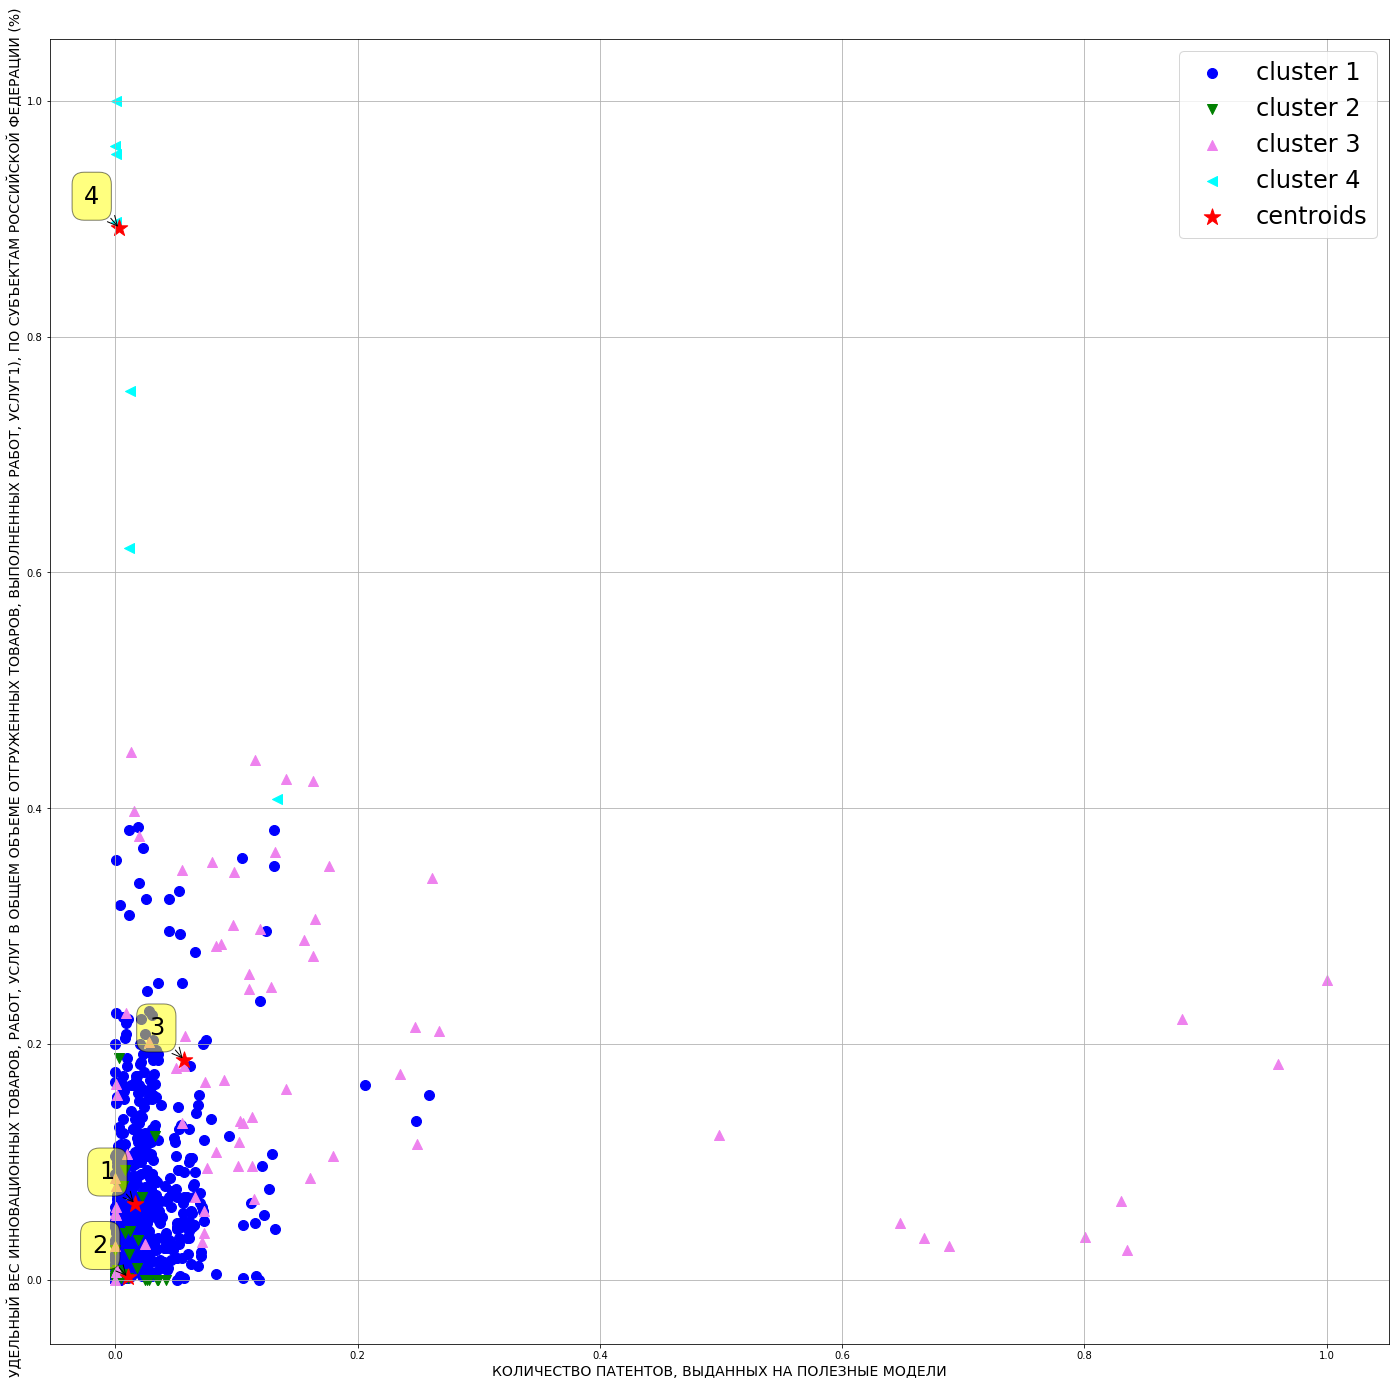

	 6


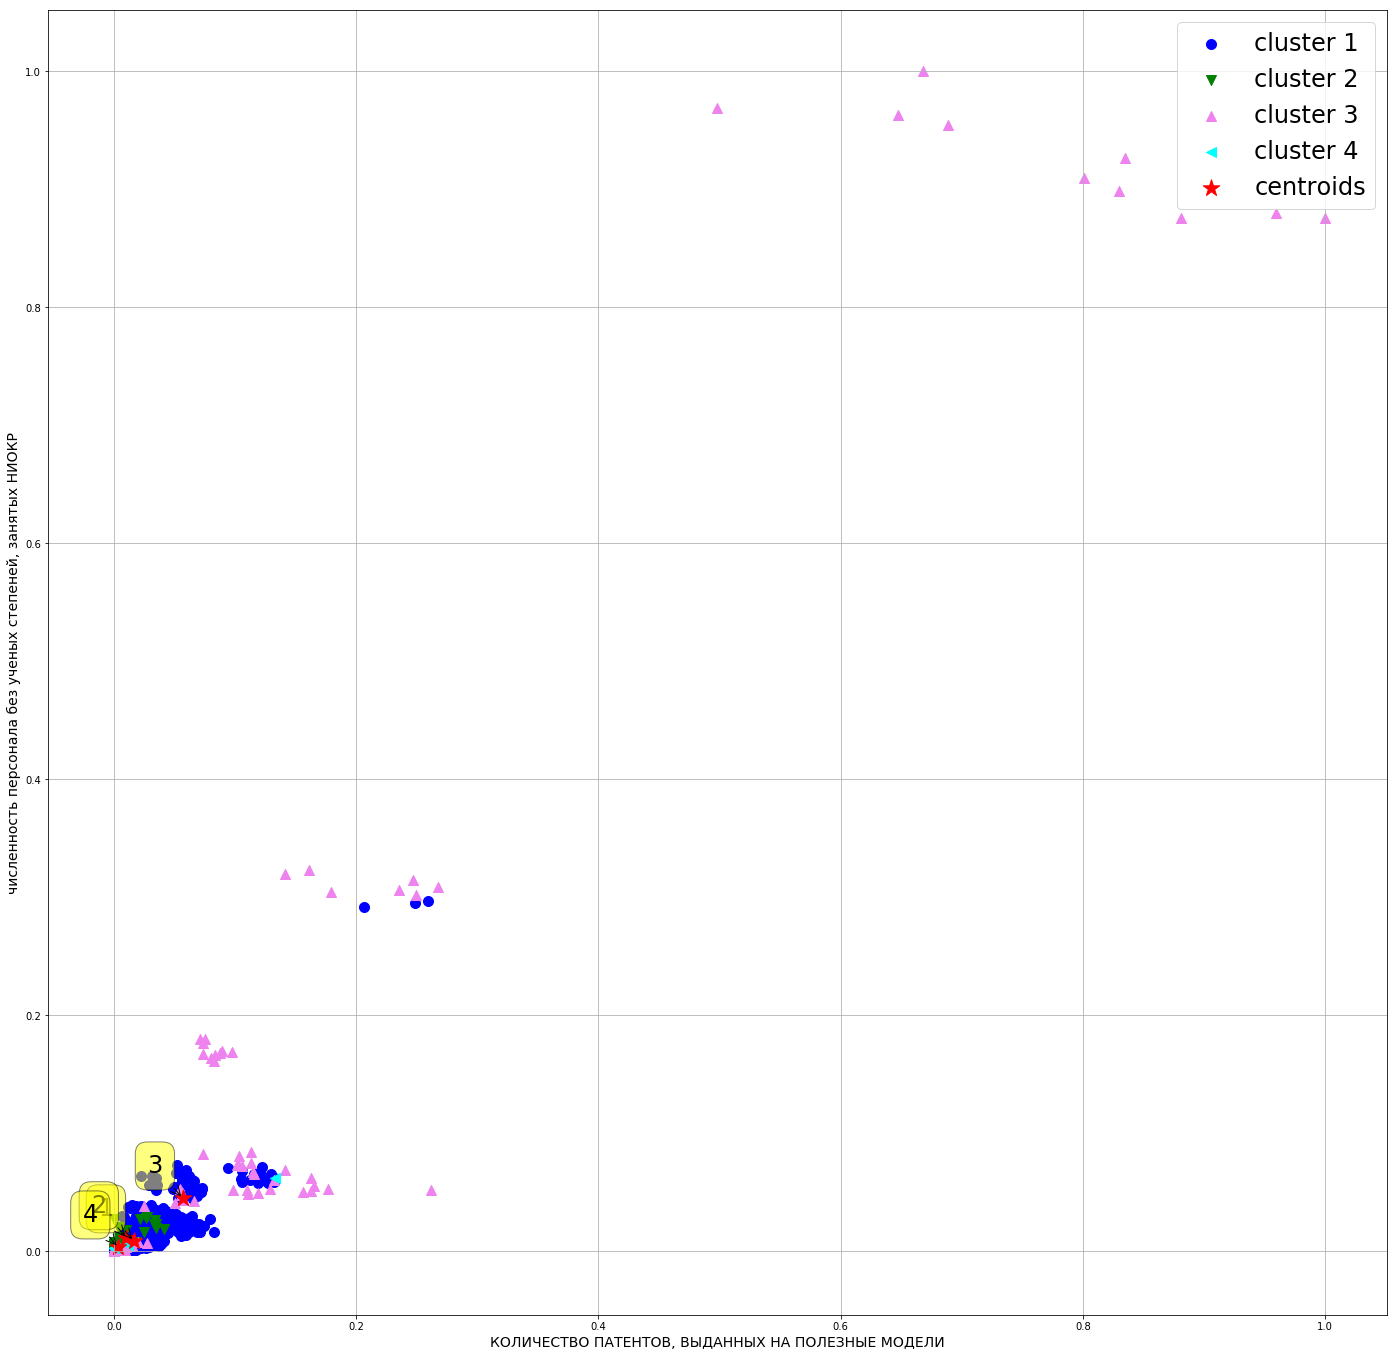

	 7


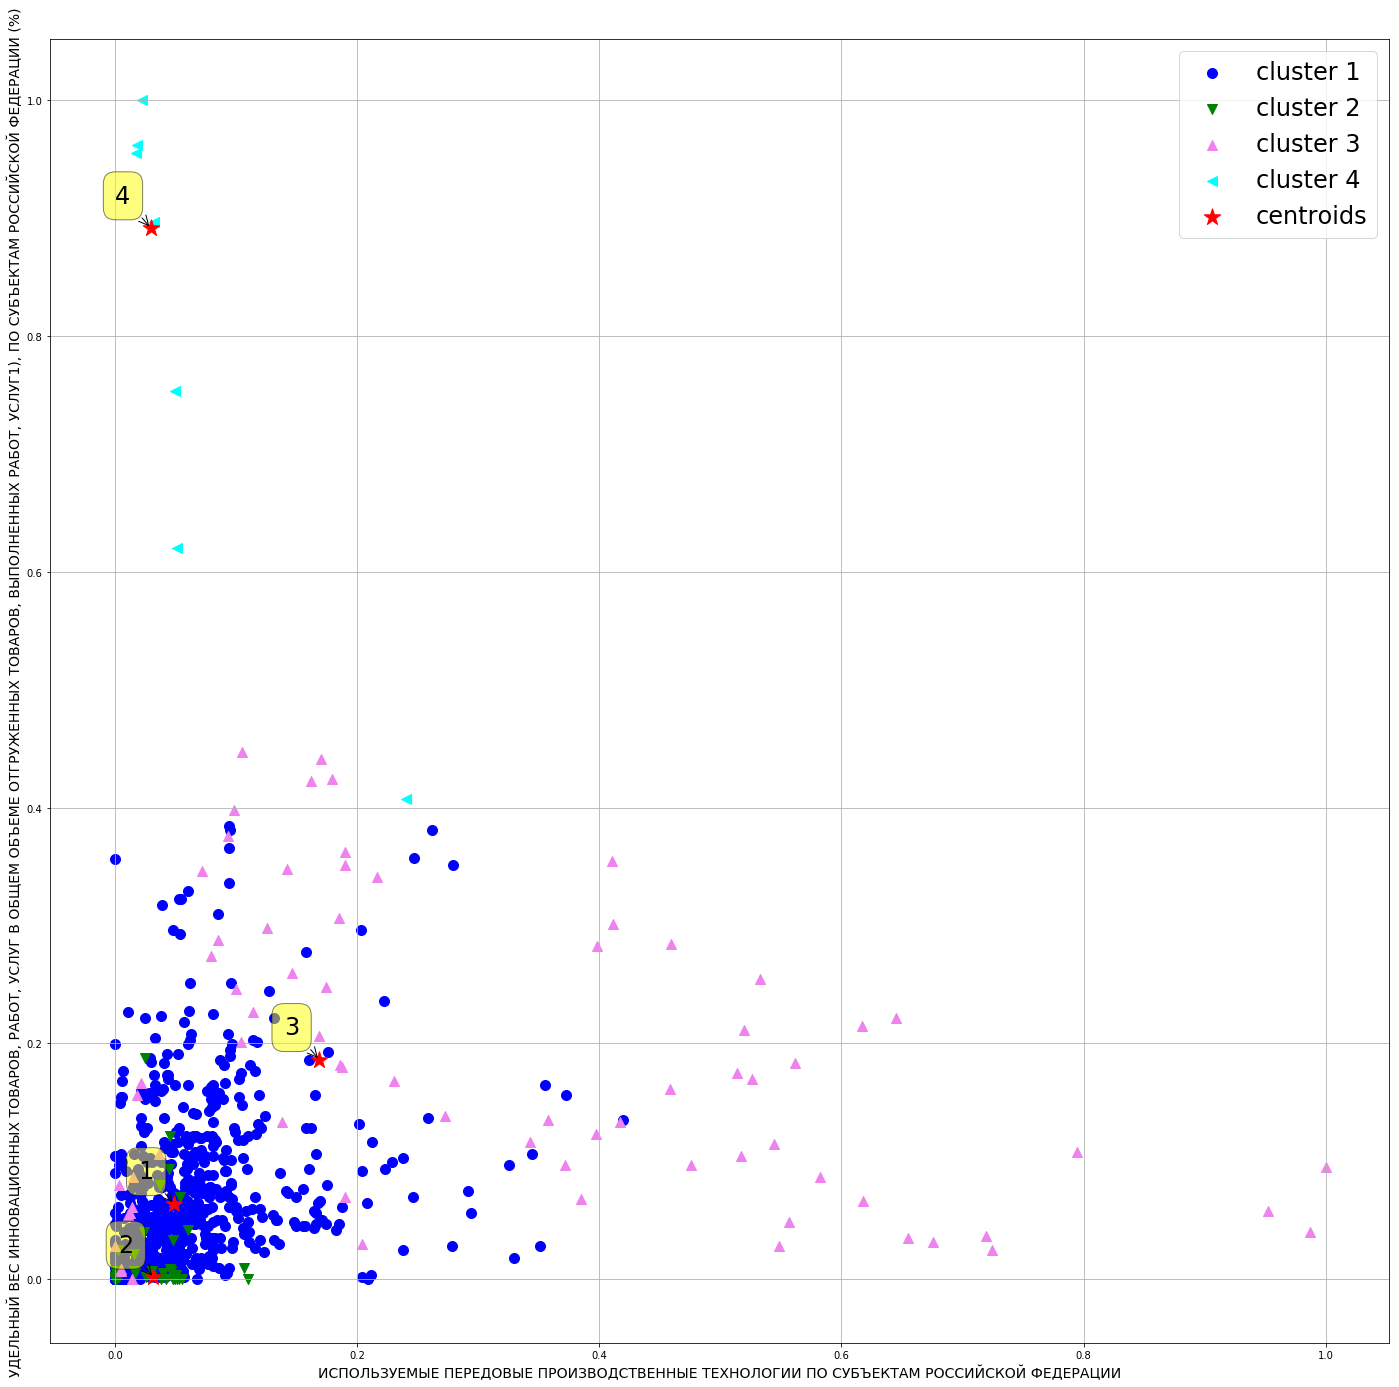

	 8


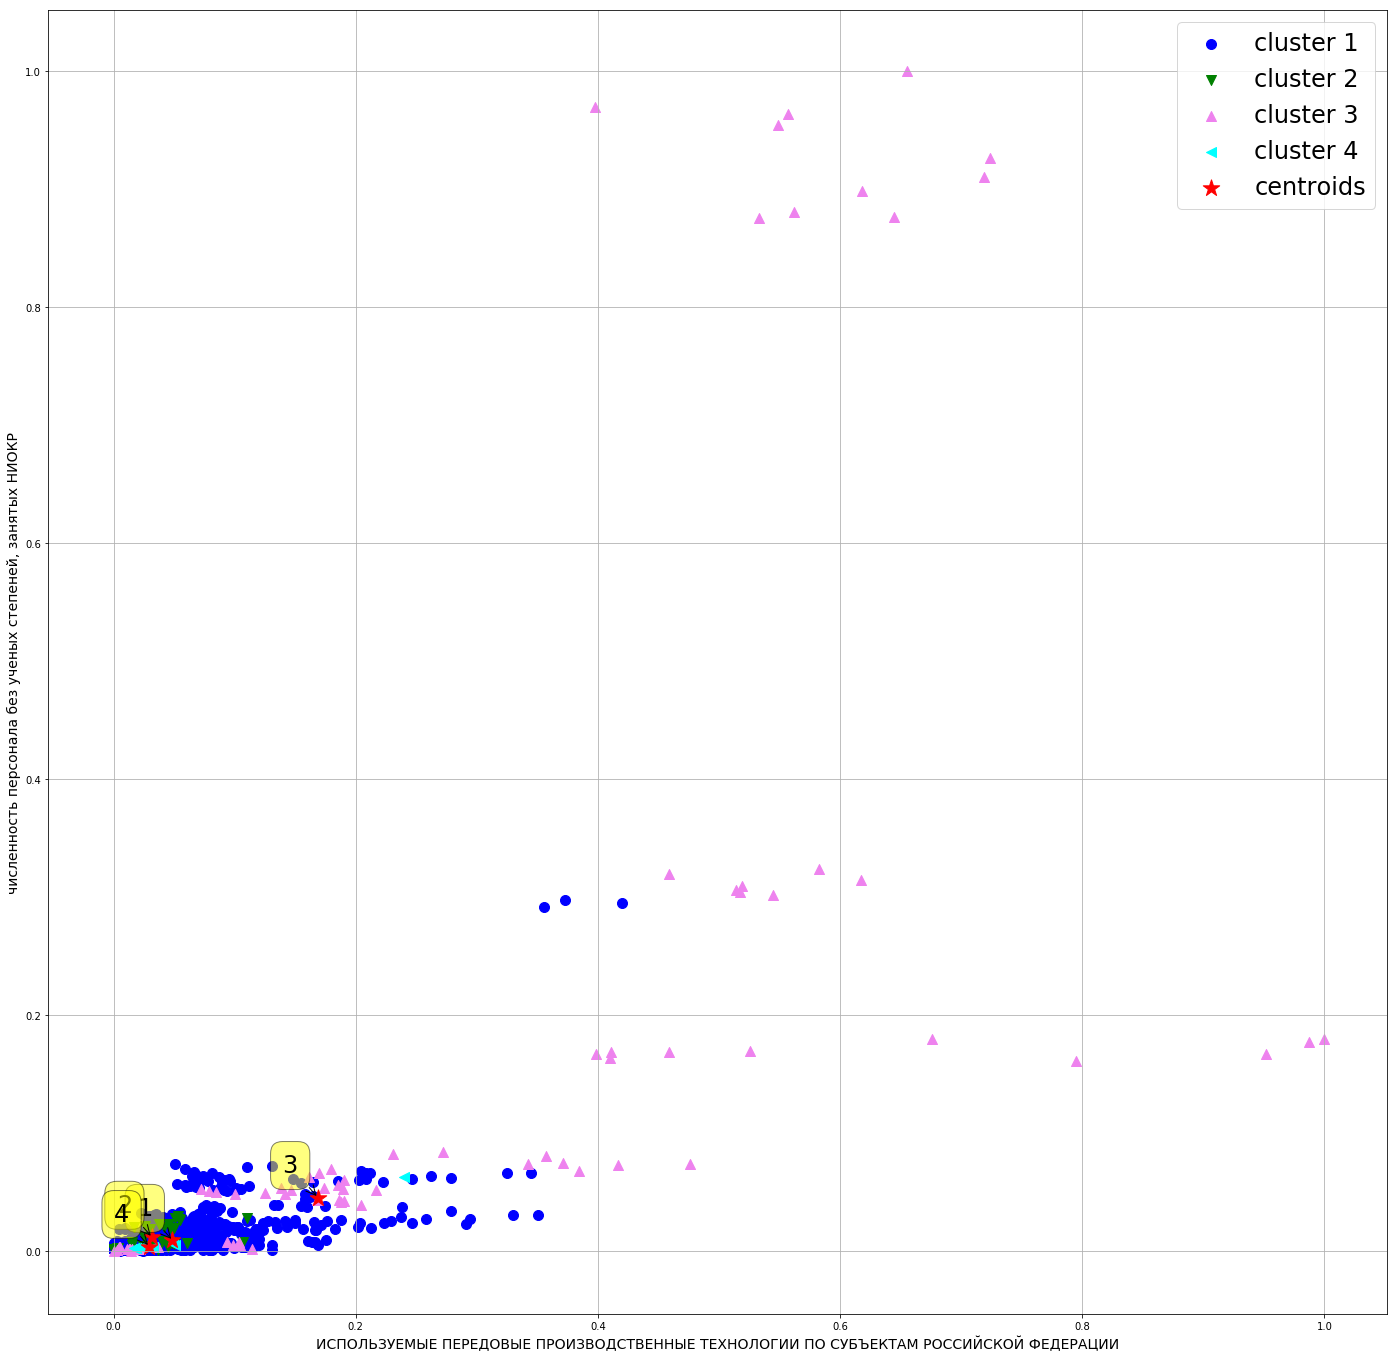

	 9


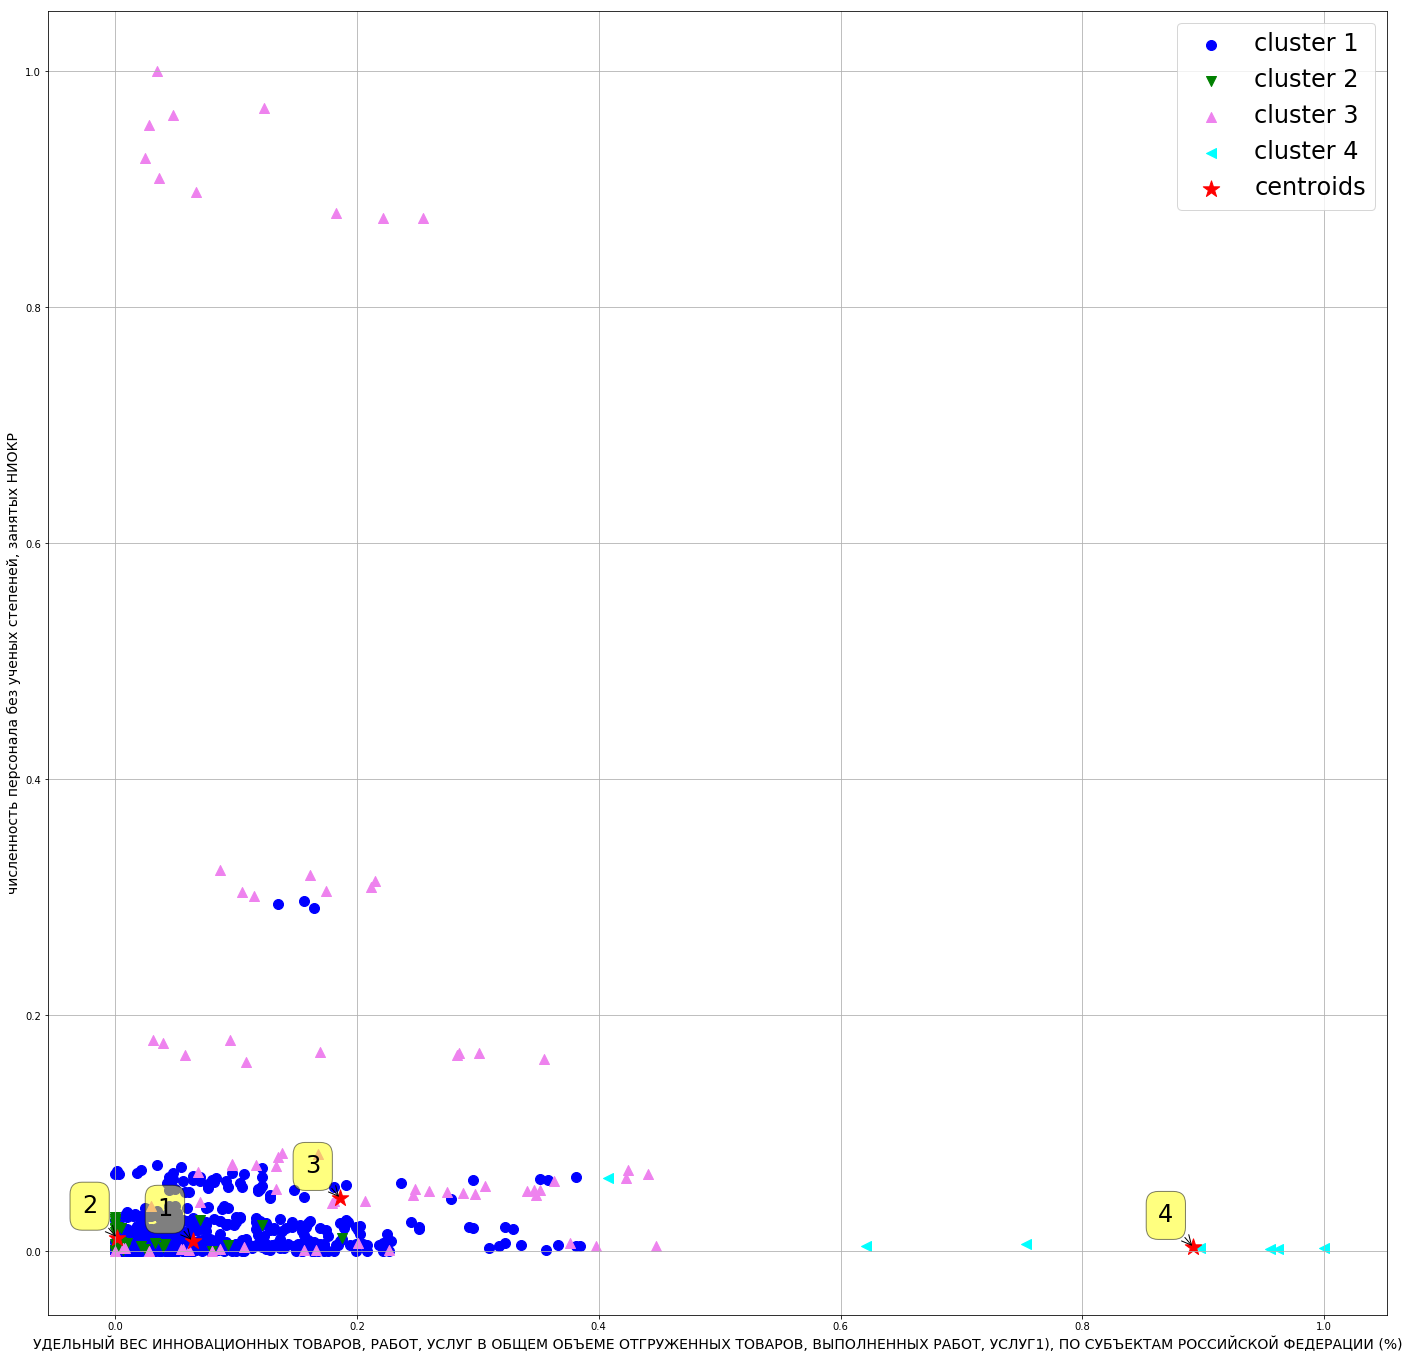

In [93]:
drawer = clusters_drawer.ClustersDrawer(
    plt,
    ms,
    X,
    (10, 7, 9, 14, 1),
    features_names=features_names_ru,
    data_colors = ['blue', 'green', 'violet', 'cyan', 'gray']
)
drawer.data_point_size = 100
drawer.draw()

In [91]:
print(list(drawer._proections_indexses))
for i, indexes in enumerate(drawer.pair_list((10, 7, 9, 14, 1))):
    x_index, y_index = indexes
    print("\n", i, features_names_ru[x_index], ' | ', features_names_ru[y_index])

[]

 0 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)  |  КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ

 1 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)  |  ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ

 2 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)  |  УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ, УСЛУГ1), ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)

 3 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБ

Сразу стоит указать, что на каждом изображении (двумерной проекции) содеражится полный временной (ударение на "о") слепок каждого кластера. То есть каждый регион на изображении скорее всего встречается несколько раз, равное количеству лет охватываемым временным диапазоном на протяжении которого мы кластеризуем. причём он может быть в общем случае быть обозначен разными значками с разным цветом, обозначающими принадлежность к разным кластерам (может с течением времени "путешествовать" по кластерам).
Далее можно попробовать сделать некие общие выводы глядя на построенные нами scatter plot диаграммы, и попробовать определить критерии принадлежности к каждому кластеру (или иначе - попробовать на человеческом языке как то назвать полученные кластеры).
В качестве примера подробнее разберём первый же рисунок, на которм изображена зависимость количества полезных моделей в зависимости от "степени интернатизации".
Глядя на изображение можно сделать выввод, что большая часть регионов на протяжении срока наблюдения попадает в кластер 1 для которого довольно высокие значения независимой переменной (степени интернатизации) не приводят тем не менее к высоким значениям зависимой (ну или лучше сказать "коррелирующей, причём возможно нелинейно") переменной (количеству полезных патентов).
Кластер 2 можно охарактеризовать тем, что низкие значения независимой переменной соответсвуют низким значениям зависимой.
Кластер 3 можно охарактеризовать тем, что для него высокие значения независимой переменной соответствует высоким значениям зависимой.
Про кластер 4 из анализа 1-го изображения пока ничего определённого сказать нельзя, на первый взгляд он не отличается от кластера 1.

Выводим списки регионов сгрупированные в кластера по годам.
Для этого добавляем в главный датафрейм с которым мы оперируем информацию о принадлежности региона к кластеру в виде столбца "cluster_label". Разделяем главный датафрейм на список датафреймов в котором каждый элемент списка - отдельный кластер.

In [55]:
hier_concatenated_df['cluster_label'] = ms.labels_
clusters = [hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == i] for i in range(4)]

Определям функцию для разбиения кластера (датафрейма в котором регионы сгрупированны по кластерам) по годам.

In [56]:
def decompose_clusters_by_years(clusters, years):
    return {year: [cluster.loc[year]['Region'] for cluster in clusters] for year in years}

Определяем временной диапазон.

In [57]:
years = range(2005, 2015)

Разбиваем кластера по годам.

In [58]:
clusters_by_years = decompose_clusters_by_years(clusters, years)

In [59]:
for year in years:
    print("\n\nГод: ", year)
    for i, cluster in enumerate(clusters_by_years[year]):
        print("\nКластер: ", i + 1)
        #print(cluster.columns)
        #print(cluster)
        for name in cluster:
            print(name)
        



Год:  2005

Кластер:  1
Белгородская область
Владимирская область
Воронежская область
Калужская область
Липецкая область
Рязанская область
Тамбовская область
Ярославская область
Республика Карелия
Республика Коми
Ненецкий автономный округ
Вологодская область
Калинингpадская область
Ленинградская область
Мурманская область
Новгородская область
Псковская область
Республика Адыгея
Краснодарский край
Астраханская область
Волгоградская область
Ростовская область
Республика Дагестан
Ставропольский край
Республика Башкортостан
Республика Марий Эл
Удмуртская Республика
Чувашская Республика
Оренбургская область
Пензенская область
Саратовская область
Челябинская область
Республика Алтай
Республика Хакасия
Алтайский край
Красноярский край
Иркутская область
Кемеровская область
Новосибирская область
Омская область
Томская область
Республика Саха (Якутия)
Камчатский край
Приморский край
Хабаровский край
Магаданская область
Сахалинская область
Чукотский автономный округ

Кластер:  2
Брянская област

Далее необходимо решить задачу отображения информации о кластеризованных регионах на карте административных единиц Российской Федерации.

Загружаем значения кодов регионов.

In [60]:
region_codes_df = pd.read_csv('codes.csv', sep=';')
region_codes_with_names = region_codes_df.values

Загружаем карту административных единиц РФ с сопутствующей информацией. Карты  в формате Shapefile находяться в свободном доступе здесь: https://gadm.org/data.html. Для работы с картами в данном формате используетя Python библиотека с таким же названием.

In [61]:
rus_adm_units = shapefile.Reader('unzip/RUS_adm1')

Из загруженных данных читаем информацию о регионах (содержащую, в частности названия регионов), и собственно, само геометрическое описание регионов (в виде неких многоугольников).

In [62]:
rus_adm_units_records = rus_adm_units.records()
rus_adm_units_shapes = rus_adm_units.shapes()

Дальше определено несколько вспомогательных функций/участков кода в основном предназначенных для сопоставления названий регионов (административных единиц) взятых из различных источников: данных о иновационной активности, кодов регионов, географической информации. Из каждого названия выделяется основная (значимая) часть. Многие регионы в различных источниках пишуться по разному, применяються различные аббревиатуры, и т.д, поэтому некоторые названия пришлось сопоставлять вручную. Имена (названия) определяемых функция и переменных даны с учётом того что имя должно сообщать максимальную информацию о смысле данной функции (переменной), с другой стороны возможности да и необходимости давать (и, следовательно придумывать) максимально "красивые" имена с точки зрения программирования у нас здесь нет, поэтому имена получились такими, какими получились. Так же с помощью определённых далее вспомогательных функций производиться сопоставление регионов (их индексов в соответствующих списках) из различных источников, на основе ранее выделенных главных частей названий, что нужно для отрисовки регионов с их кодами на карте.

In [63]:
region_map_names = [record[10] if record[10] else 'Москва' for record in rus_adm_units_records]

In [64]:
cutted_name_part = ('край', 'область', 'республика', 'аок', 'аоб', '', '(якутия)', 'респу', 'респуб', '(горсовет)', 'автономный', 'автономная', 'округ', 'респу́блика')
def extract_main_name_part(name):
    lower_case_name = name.lower()
    splitted_name = lower_case_name.split(' ')
    main_name_part_components = []
    for name_part in splitted_name:
        if name_part not in cutted_name_part:
            main_name_part_components.append(name_part)
    return ' '.join(main_name_part_components)

In [65]:
region_map_names_main_part = [extract_main_name_part(name) for name in region_map_names]
#region_codes_names_main_part = [[extract_main_name_part(record[0]), record[1]] for record in region_codes_values]
region_codes_names_main_part = [extract_main_name_part(record[0]) for record in region_codes_with_names]
region_codes = [record[1]  for record in region_codes_with_names]

In [66]:
def fix_names(region_names):
    #sverdlovsk_count = 0
    fixed_names = []
    for name in region_names:
        if name == 'калинингpадская':
            fixed_names.append('калининградская')
        elif name == 'ингуше́тия':
            fixed_names.append('ингушетия')
        else:
            fixed_names.append(name)
    return fixed_names

In [67]:
fixed_region_map_names_main_part = fix_names(region_map_names_main_part)
fixed_regions_codes_names_main_part = fix_names(region_codes_names_main_part)

In [68]:
region_names_from_dataset = merged_df_list[-1]['Region'].tolist()

In [69]:
region_names_from_dataset_main_part = [extract_main_name_part(name) for name in region_names_from_dataset]

In [70]:
fixed_region_names_from_dataset_main_part = fix_names(region_names_from_dataset_main_part)

In [71]:
def correct_names_from_unit_map(region_names):
    corrected_region_names = []
    for region_name in region_names:
        if region_name == 'пермская':
            corrected_region_names.append('пермский')
        elif region_name == 'камчатская':
            corrected_region_names.append('камчатский')
        elif region_name == 'чечено-ингушска':
            corrected_region_names.append('чеченская')
        elif region_name == 'eврейская':
            corrected_region_names.append('еврейская')
        elif region_name == 'карачаево-черкесская':
            corrected_region_names.append('карачаево-черкессия')
        elif region_name == 'ханты-мансийский - югра':
            corrected_region_names.append('ханты-мансийский')
        elif region_name == 'северная осетия - алания':
            corrected_region_names.append('северная осетия')
        else:
            corrected_region_names.append(region_name)
    return corrected_region_names

In [72]:
corrected_region_map_names_main_part = correct_names_from_unit_map(fixed_region_map_names_main_part)
corrected_regions_codes_names_main_part = correct_names_from_unit_map(fixed_regions_codes_names_main_part)
region_codes_description = [(code, name_main_part, None) for code, name_main_part in zip(
    region_codes,
    corrected_regions_codes_names_main_part
)]
print(region_codes_description)

[('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', None), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG', 'волгоградская', None), ('ROS', 'росто

In [73]:
map_codes_indexes_bijection = {}
for i, region_map_name_main_part in enumerate(corrected_region_map_names_main_part):
    for j, region_code_name_main_part in enumerate(corrected_regions_codes_names_main_part):
        if region_map_name_main_part == region_code_name_main_part:
            map_codes_indexes_bijection[i] = j
            break

In [74]:
def extract_sign_part_clustered_names(clusters_by_years):
    sign_names_part = {}
    #print(clusters_by_years)
    for year, clustered_names_list in clusters_by_years.items():
        main_names_parts = [
            [
                extract_main_name_part(name)
                for name in clustered_names
            ]
            for clustered_names in clustered_names_list
        ]
        sign_names_part[year] = [
            fix_names(main_names_parts_cluster)
            for main_names_parts_cluster in main_names_parts
        ]
    return sign_names_part

In [75]:
clustered_sign_names_parts = extract_sign_part_clustered_names(
    clusters_by_years
)

In [76]:
def find_cluster_map_indexes(
        year_clustered_sign_names_parts,
        corrected_region_names_main_part
    ):
    year_cluster_indexes = []
    year_cluster_names = []
    for i, name in enumerate(corrected_region_names_main_part):
        if name in year_clustered_sign_names_parts:
            year_cluster_indexes.append(i)
            year_cluster_names.append(name)
    return year_cluster_indexes

In [77]:
def clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    ):
    clustered_map_indexes = {}
    for year in years:
        clustered_map_indexes[year] = [
            find_cluster_map_indexes(
                year_clustered_sign_names_parts,
                corrected_region_map_names_main_part
            ) for year_clustered_sign_names_parts in clustered_sign_names_parts[year]
        ]
    return clustered_map_indexes

In [78]:
clustered_map_indexes = clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    )

Отдельная задача - отрисовать код региона на карте так что бы код попал "внутрь" границ региона. Стандартных средств для этого в библиотеках Python нет. Задача решена в некоторых проприетарных пакетах, но налаживание взаимдействия с ними (хотя бы в виде уже готовых карт) может занять весьма неопределённое время. Поэтому попытаемся решить некий простейший вариант данной задачи, с возможнотью "ручной подстройки" координат и размера надписи. В общем виде решение данной задачи (разместить объект ограниченный неким прямоугольником "где-то внутри" произвольного, и в общем случае, невыпуклого многоуголника "ближе всего" к некоторому наиболее удобному для человеческого глаза "центру восприятия" многоугольника, смаштабировав к тому же размещаемый объект) превосходит как минимум в несколько раз по трудо и времяёмкости данную работу.
Как показали проведённые эксперименты, достаточно неплохие результаты во многих случаях даёт просто размещение надписи в центре ограничивающего регион прямоугольника (bbox в терминологии shapefiles). Размещение в центре масс многоугольника даёт худший результат, в особенности если регион имеет извилистую береговую линию (тогда центр масс сильно к ней смещён). О регионах состоящих из нескольких островов и говорить не приходится - поможет только установка надписи "вручную", как скорее всего и сделано в проприетарном ПО.
Следует оговорить что далее нарушено одно из основных правил написания хорошего программного кода: введено некоторое количество неименнованных "магических" чисел (размер шрифта), но код у нас одноразовый дальнейшей поддержки и развития не предполагает, поэтому вряд ли нарушение этого правила принесёт нам большой вред.

In [79]:
def calculate_code_coords(region_shape_num, adm_units_shapes, region_code_description):
    bbox = adm_units_shapes[region_shape_num].bbox
    len_x = abs(bbox[2] - bbox[0])
    len_y = abs(bbox[3] - bbox[1])
    if len_x > len_y:
        min_bbox_len = len_y
    else:
        min_bbox_len = len_x
    if min_bbox_len > 12:
        fsize = 18
    elif min_bbox_len > 8 and min_bbox_len <= 12:
        fsize = 16
    elif min_bbox_len > 4 and min_bbox_len <= 8:
        fsize = 12
    elif min_bbox_len > 1 and min_bbox_len <= 4:
        fsize = 10
    else:
        fsize = 10
    if region_code_description[2] != None:
        print(region_code_description)
        if region_code_description[2][2]:
            return region_code_description
        else:
            return region_code_description[2][0], region_code_description[2][1], fsize
    else:
        x_bbox_centre = (bbox[0] + bbox[2]) / 2
        y_bbox_centre = (bbox[1] + bbox[3]) / 2
        return x_bbox_centre, y_bbox_centre, fsize

Определяем таблицу кодов регионов для которых координаты (и возможно, размер) надписи будем устанавливать вручную.

In [80]:
codes_coords_table = {
    'ARK': (45.0, 65.0, None),
    'CAO': (175, 68.98645782470703, None)
}
def set_codes_coords(region_codes_description):
    new_region_codes_description = []
    for region_code_description in region_codes_description:
        new_region_codes_description.append(
            (
                region_code_description[0],
                region_code_description[1],
                codes_coords_table.get(region_code_description[0])
            )
        )
    return new_region_codes_description

In [81]:
region_codes_description = set_codes_coords(region_codes_description)

Определяем функцию (довольно громоздкую и сложную) отрисовывающую карту регионов.

In [82]:
def draw_clustered_regions(
        year_clustered_map_indexes,
        map_codes_indexes_bijection,
        region_codes,
        cluster_colors,
        adm_units_shapes
    ):
    print("region_codes: ", region_codes)
    num_of_shapes = len(adm_units_shapes)
    fig = plt.figure(figsize=(24, 12))
    ax = fig.add_subplot(111)
    list_of_pathes_list = []
    non_clustered_index_set = list(range(num_of_shapes))
    non_clustred_pathes_list = []
    for cluster_map_indexes, cluster_color in zip(year_clustered_map_indexes, cluster_colors):
        clustered_index_set = []
        text_xy_list_mean = []
        text_xy_list_bbox = []
        text_xy_list = []
        codes = []
        for shape_num in non_clustered_index_set:
            cluster_pathes_list = []
            region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
            points = np.array(adm_units_shapes[shape_num].points)
            text_x, text_y, fsize = calculate_code_coords(shape_num, adm_units_shapes, region_code_description)
            print(region_code_description[0], region_code_description[1], (text_x, text_y), fsize)
            text_xy_list.append((text_x, text_y, fsize))
            codes.append(region_code_description)
            parts = adm_units_shapes[shape_num].parts
            par = list(parts) + [points.shape[0]]
            for point_i_j in range(len(parts)):
                if shape_num in cluster_map_indexes:
                    polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
                    cluster_pathes_list.append(polygon)
                    if shape_num not in clustered_index_set:
                        clustered_index_set.append(shape_num)

            list_of_pathes_list.append(cluster_pathes_list)
            cluster_collection = collections.PatchCollection(cluster_pathes_list, edgecolor='black', linewidths=1.0)
            cluster_array = cluster_collection.get_array()
            cluster_collection.set_facecolor(cluster_color)
            ax.add_collection(cluster_collection)
            
        for text_xy, code in zip(text_xy_list, codes):
            ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='red')
        print("clustered_index_set: ", clustered_index_set)
        print("non_clustered_index_set before delete: ", non_clustered_index_set)
        for i in clustered_index_set:
            if i in non_clustered_index_set:
                non_clustered_index_set.remove(i)
        print("non_clustered_index_set after delete: ", non_clustered_index_set)
                
                
    pathes_list = []
    text_xy_list = []
    codes = []
    print("non_clustered_index_set:\n", non_clustered_index_set)
    for shape_num in non_clustered_index_set:
        region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
        #codes.append(region_codes[map_codes_indexes_bijection[shape_num]])
        codes.append(region_code_description)
        points = np.array(adm_units_shapes[shape_num].points)
        text_x, text_y, fsize = calculate_code_coords(shape_num, adm_units_shapes, region_code_description)
        text_xy_list.append((text_x, text_y, fsize))        
        parts = adm_units_shapes[shape_num].parts
        par = list(parts) + [points.shape[0]]
        for point_i_j in range(len(parts)):
            polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]], label=str(shape_num))
            pathes_list.append(polygon)
    non_clustered_collection = collections.PatchCollection(pathes_list, edgecolor='black', linewidths=2.0)
    non_clustered_collection.set_facecolor('purple')
    ax.add_collection(non_clustered_collection)

    for text_xy, code in zip(text_xy_list, codes):
        ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='gray')    
    ax.set_xlim(10, +190)
    ax.set_ylim(40, 84)
    #plt.legend()
    plt.show()

Вызываем функцию для каждого года, отрисоывая регионы принадлежащие данному кластеру в данном году.

Год:  2005
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
BRY брянская (33.26635169982923, 52.9399681091309) 10
BUR бурятия (107.78960037231451, 53.595333099365305) 12
CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ING ингушетия (44.94737625122078, 43.09981918334963) 10
IVA ивановская (41.643217086792276, 57.026172637939474) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAM калмыкия (44.62885856628432, 46.499729156494205) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
KIR кировская (50.11251449584976, 58.58652877807618) 12
KOS костромская (44.02028274536129, 58.449003219604535) 10
KUR курганская (65.30985260009766, 55.52977371215826) 10
KUR курская (36.368535995483555, 51.71346092224134) 10
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74

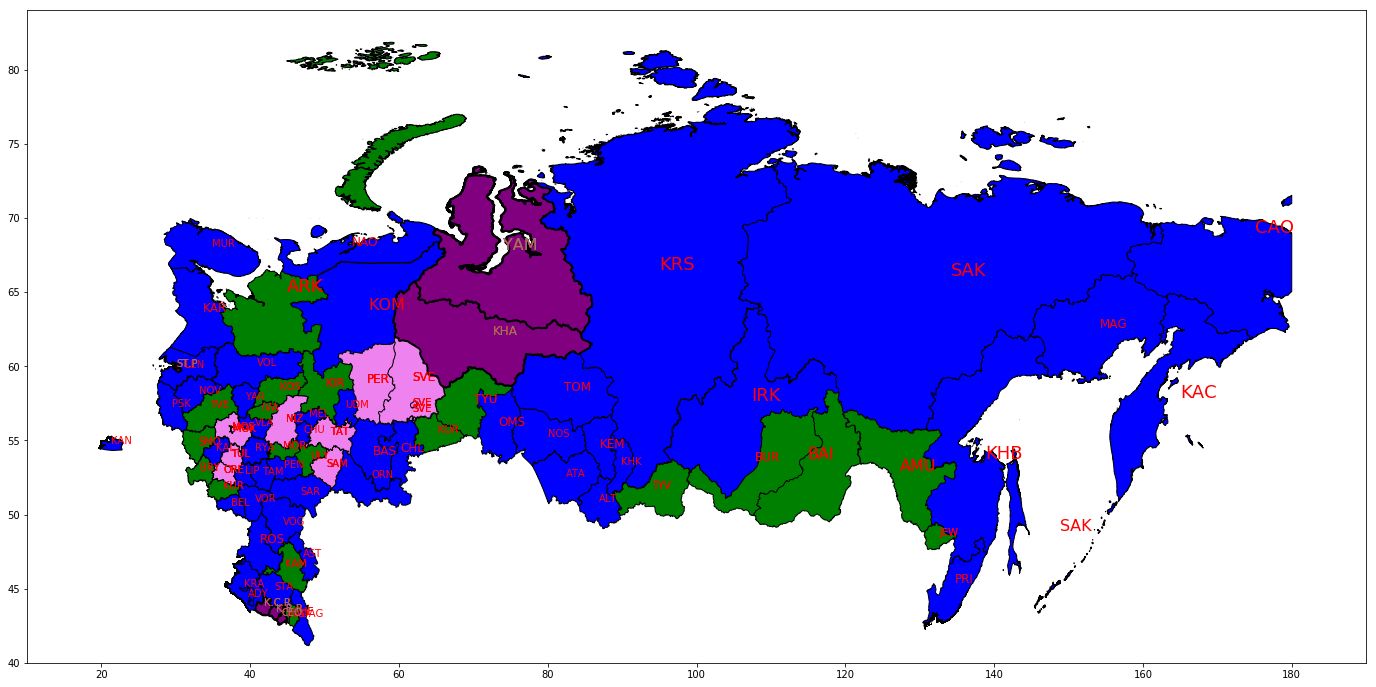

Год:  2006
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ING ингушетия (44.94737625122078, 43.09981918334963) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAM калмыкия (44.62885856628432, 46.499729156494205) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
KIR кировская (50.11251449584976, 58.58652877807618) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.787879

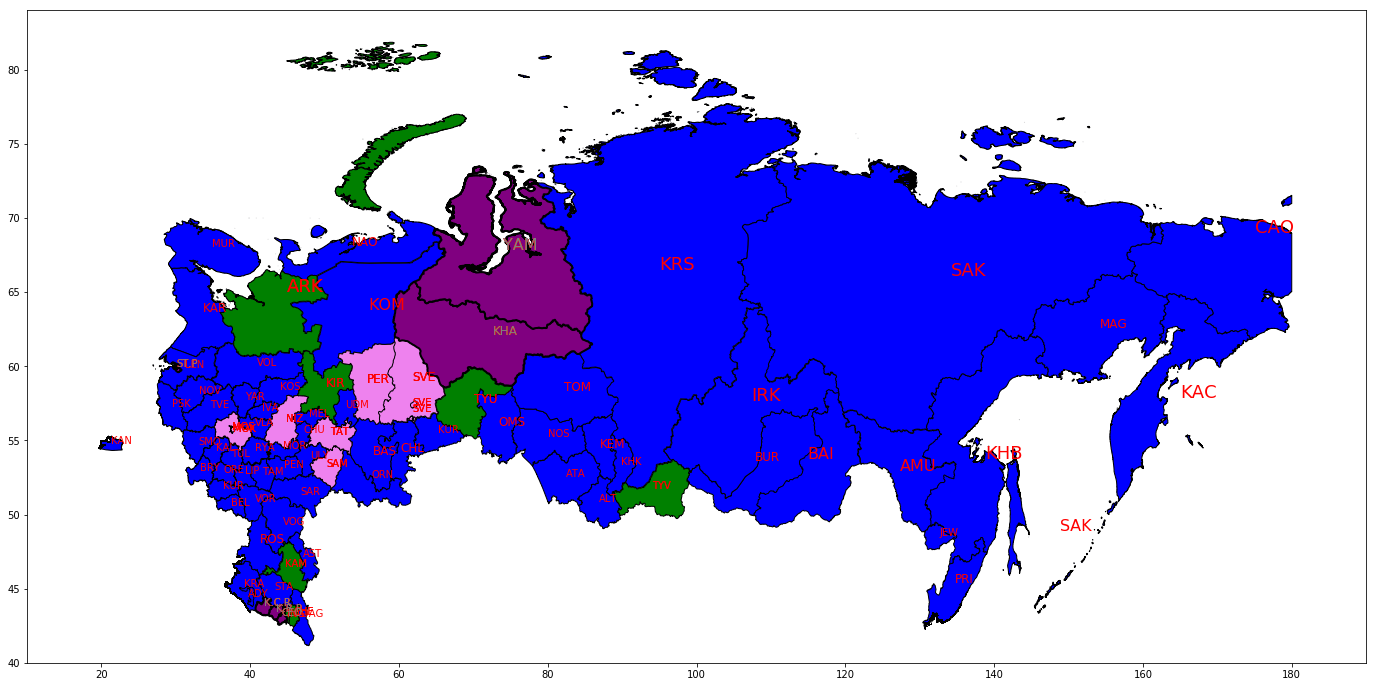

Год:  2007
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ING ингушетия (44.94737625122078, 43.09981918334963) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.376993

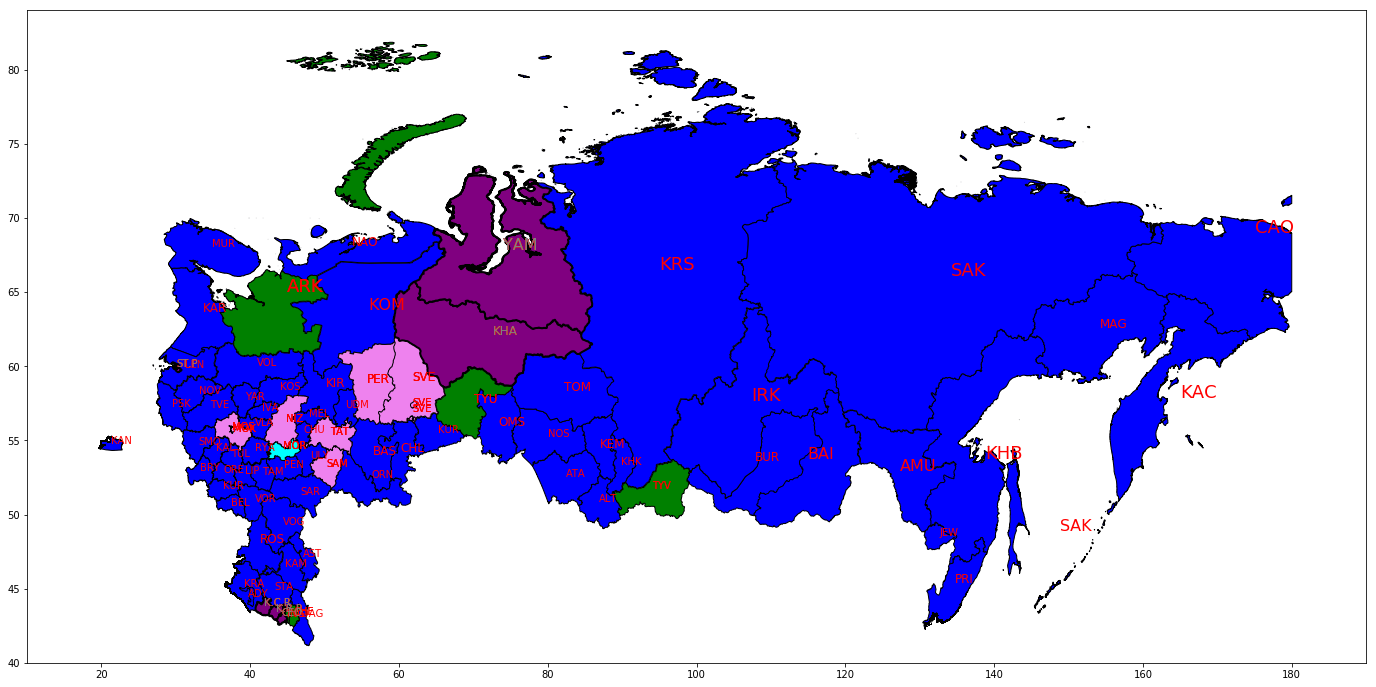

Год:  2008
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.37699317932129) 10
TYV тыва (94.004352

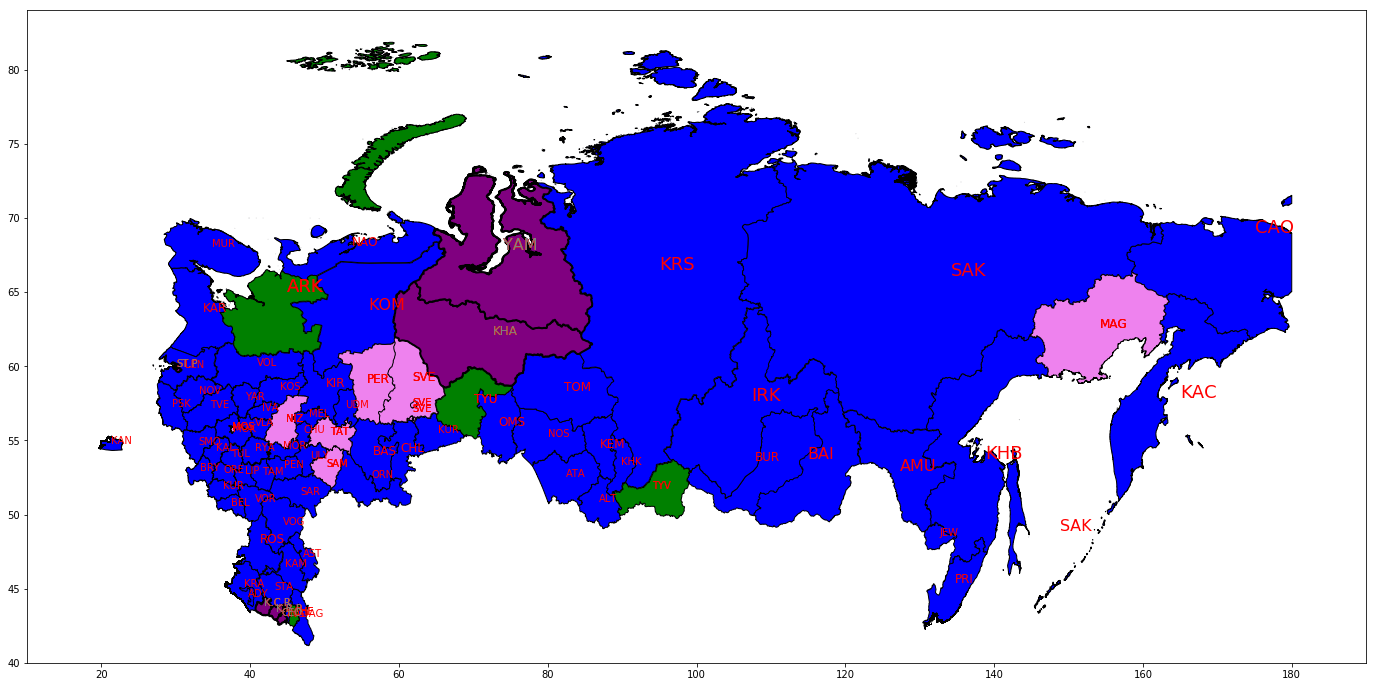

Год:  2009
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

clustered_index_set:  [3, 74]
non_clustered_index_set before delete:  [3, 13, 19, 24, 29, 39, 42, 46, 47, 54, 65, 66, 67, 69, 74, 81]
non_clustered_index_set after delete:  [13, 19, 24, 29, 39, 42, 46, 47, 54, 65, 66, 67, 69, 81]
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 5

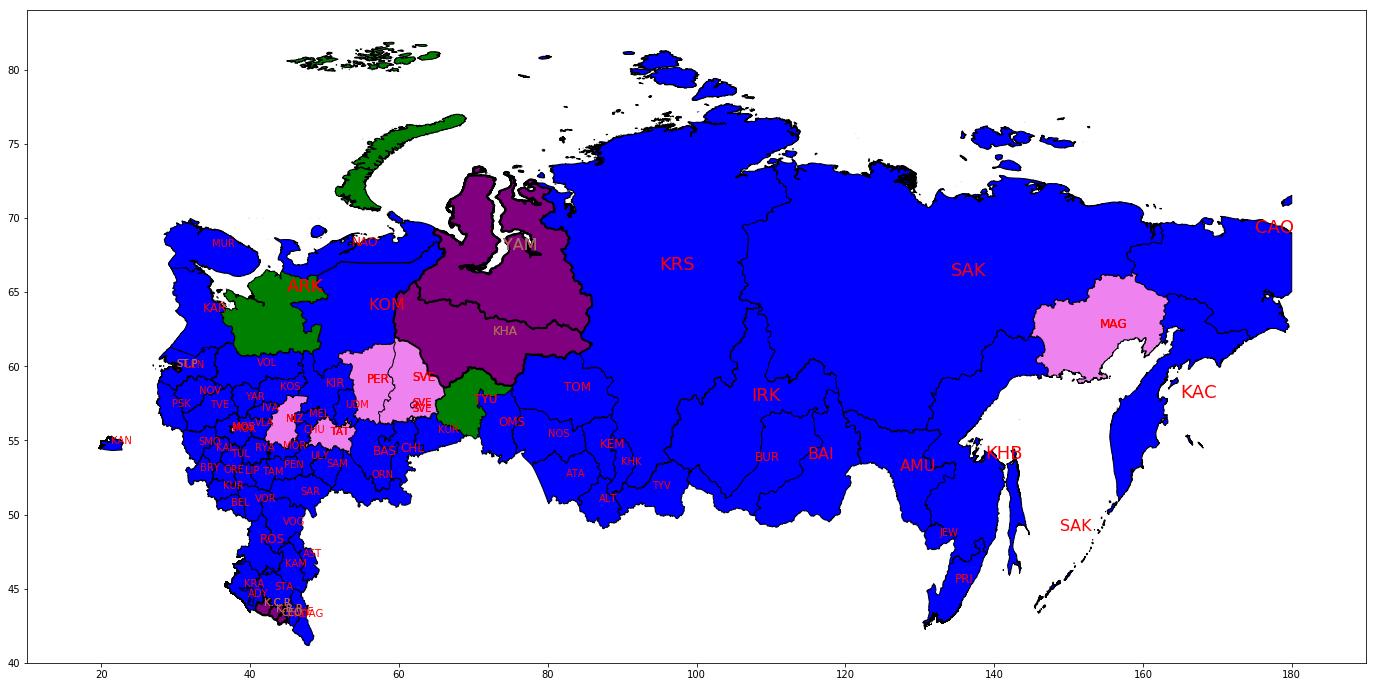

Год:  2010
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

non_clustered_index_set after delete:  [3, 13, 19, 24, 29, 39, 42, 46, 47, 54, 65, 66, 67, 69, 74, 81]
('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.37699317932129) 10
TYU тюменская (70.040897369

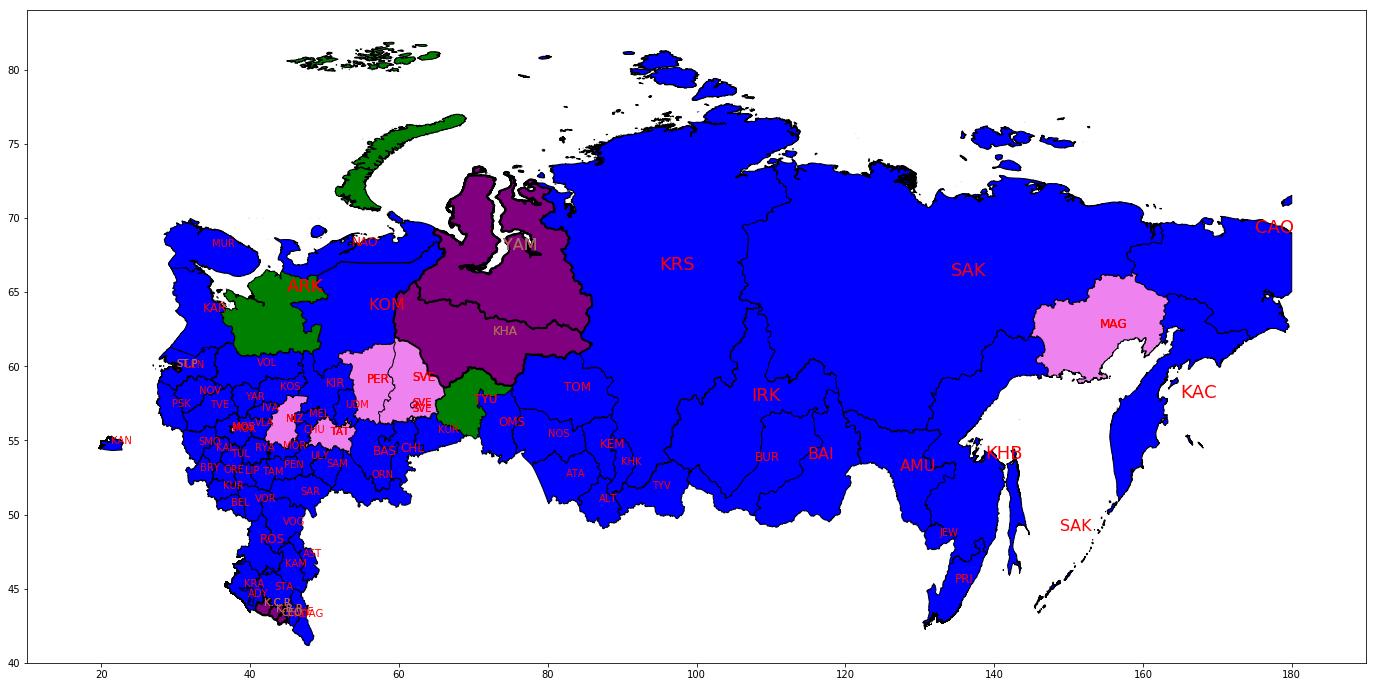

Год:  2011
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

non_clustered_index_set after delete:  [3, 13, 15, 19, 23, 24, 29, 39, 42, 43, 46, 47, 59, 65, 66, 67, 69, 74, 81]
('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ALT алтай (86.9206581115723, 50.864498138427805) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAC камчатский (165.004135131836, 57.8880233764649) 18
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.

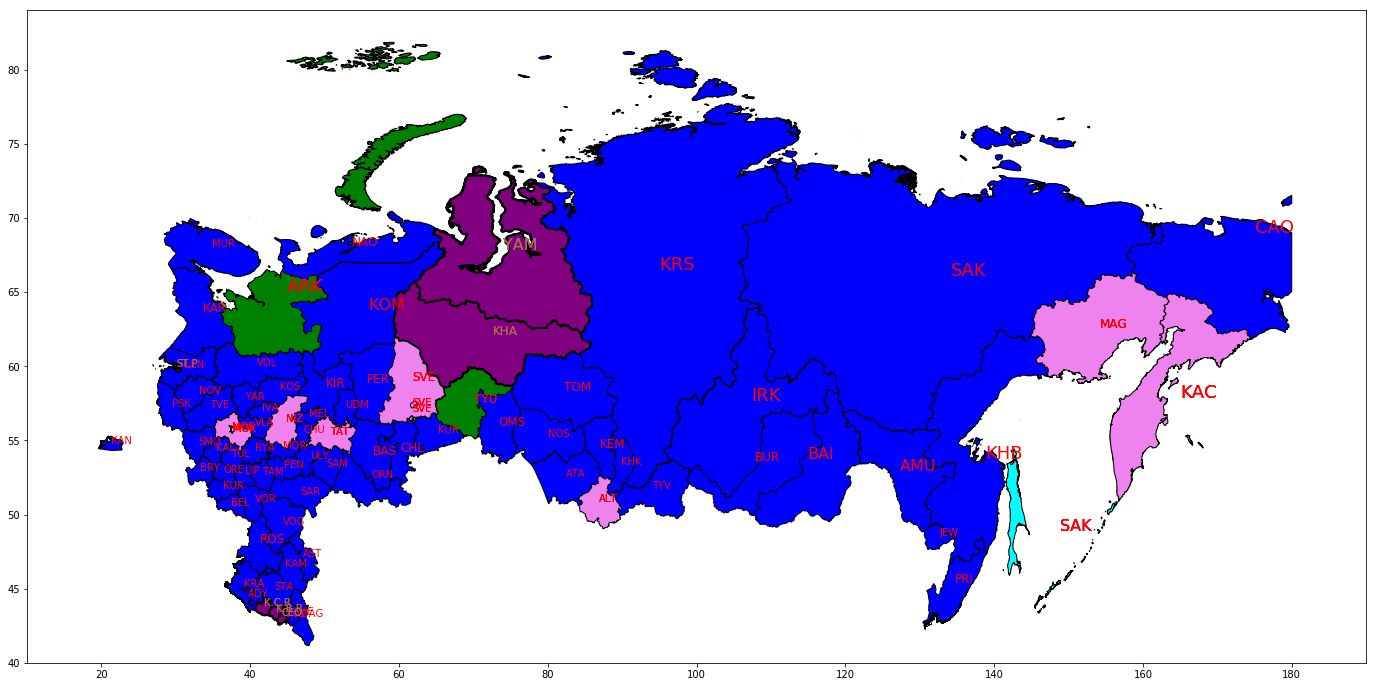

Год:  2012
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
CHU чувашская (47.207590103149556, 55.49068832397468) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAC камчатский (165.004135131836, 57.8880233764649) 18
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская

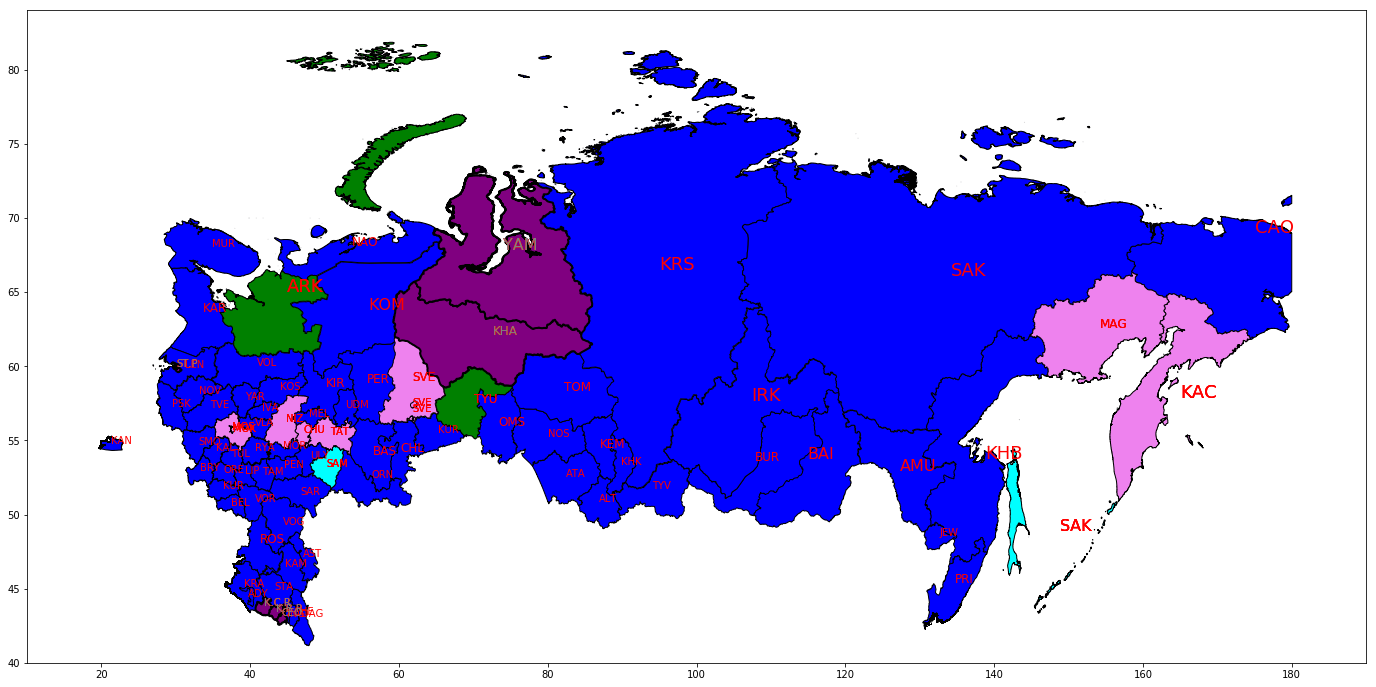

Год:  2013
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
('CAO', 'чукотский', (175, 68.98645782470703, None))
CAO чукотский (175, 68.98645782470703) 18
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
TAT татарстан (50.74247741699237, 55.37699317932129) 10
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_index_set:  []
non_cluste

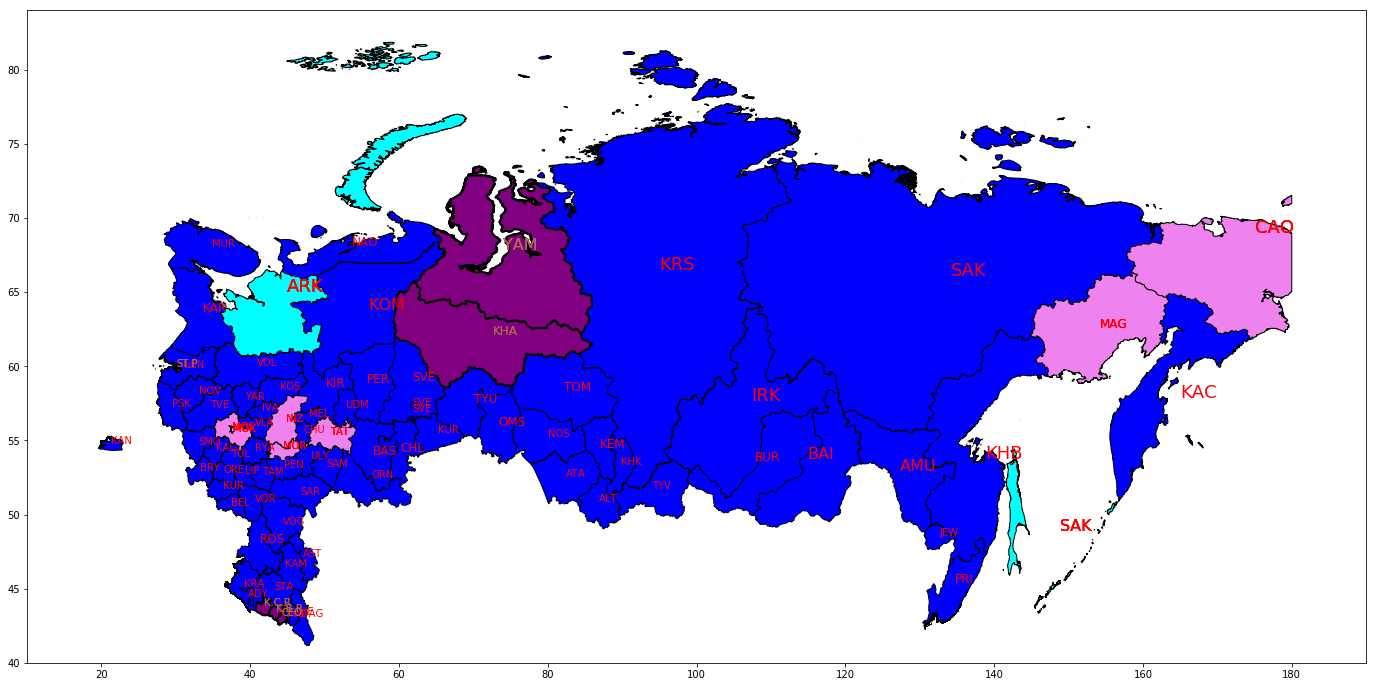

Год:  2014
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
LIP липецкая (39.25826644897474, 52.73612022399908) 10
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
TAT татарстан (50.74247741699237, 55.37699317932129) 10
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_index_set:  []
non_clustered_index_set before delete:  [11, 12, 13, 19, 24, 29, 38, 41, 42, 43, 46, 47, 59, 69, 81]
non_clustered_index_set after delete:  [11, 12, 13, 19, 24, 29, 38, 41, 42, 43, 46, 47, 59, 69, 81]
('CAO', 'чукотский', (175, 68.98645782470703, None))

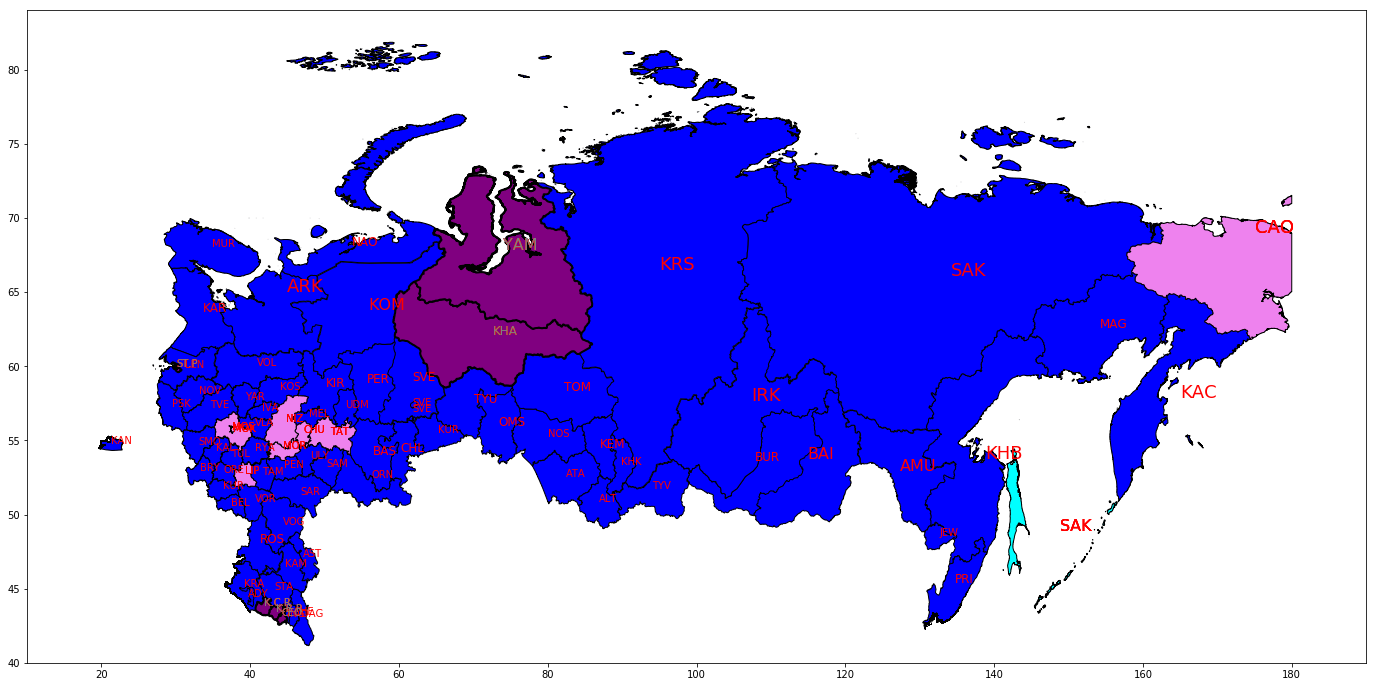

In [83]:
for year in years:
    print("Год: ", year)
    draw_clustered_regions(clustered_map_indexes[year], map_codes_indexes_bijection, region_codes_description, ['blue', 'green', 'violet', 'cyan', 'gray'], rus_adm_units_shapes)